In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Changing the root path
root_path = 'gdrive/My Drive/kaggle/'

In [3]:
# changing the current working directory
%cd /content/gdrive/My Drive/kaggle

/content/gdrive/My Drive/kaggle


In [4]:
!pip install mlens

     |████████████████████████████████| 235kB 5.5MB/s 


In [5]:
# importing the required Libraries
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV,RidgeCV
from sklearn.linear_model import SGDRegressor
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, learning_curve, cross_val_predict
from sklearn.model_selection import cross_val_score
from mlens.visualization import corrmat
from sklearn.feature_selection import RFECV
import traceback

[MLENS] backend: threading


In [6]:
from tensorflow.compat.v1.keras.callbacks import ModelCheckpoint

In [7]:
%%time
# Reading the dataset
data = pd.read_csv('vehicles_db6.csv', index_col = False)

CPU times: user 503 ms, sys: 71.8 ms, total: 574 ms
Wall time: 1.58 s


In [8]:
data.drop(data.filter(regex="Unnamed"),axis=1, inplace=True)

In [9]:
data.head()

price      year  ...  paint_color_encoded  state_encoded
0  0.00000  0.745098  ...             0.000000       0.335611
1  0.00364  0.911765  ...             1.000000       0.335611
2  0.00798  0.764706  ...             0.353943       0.335611
3  0.00840  0.980392  ...             0.371953       0.335611
4  0.00984  0.990196  ...             1.000000       0.335611

[5 rows x 18 columns]

In [10]:
data.drop(['year', 'age_of_ad_in_days'], axis = 1, inplace = True)

In [11]:
data.head()

price  condition  ...  paint_color_encoded  state_encoded
0  0.00000        0.2  ...             0.000000       0.335611
1  0.00364        0.6  ...             1.000000       0.335611
2  0.00798        0.2  ...             0.353943       0.335611
3  0.00840        0.6  ...             0.371953       0.335611
4  0.00984        0.8  ...             1.000000       0.335611

[5 rows x 16 columns]

In [12]:
class ErrorHandler:
  def handleErr(self, error):
    return error

In [13]:
import time
class modeler:
    measurement = pd.DataFrame()
    def __init__(self):
        self.errObj = ErrorHandler()
    
    
            
    def splitData(self, data, response):
        try:
            
            predictor = data.drop(response, axis=1)
            target = data[response]

            predictorTrain, predictorTest, targetTrain, targetTest = train_test_split(predictor, target, test_size=0.2,
                                                                                      random_state=0, shuffle=False)
 
                
            return predictorTrain, predictorTest, targetTrain, targetTest
        except Exception as exp:
            err = self.errObj.handleErr(str(exp))
            print(str(err)) 
            traceback.print_exc() 

    def viewImportantFeatures(self, predictorTrain, model, modelName):
        try:
            # Extract feature importances - https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76
            # https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
            sns.set(font_scale = 1.75)
            sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
                           "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
                           'ytick.color': '0.4'})
            
            # Set figure size and create barplot
            f, ax = plt.subplots(figsize=(12, 9))

            featureImportance = pd.DataFrame({'feature': list(predictorTrain.columns),
                               'importance': model.feature_importances_}).sort_values('importance', ascending=False)

            # Display
            #plt.figure(figsize=(10, 10))
            chart = sns.barplot(x='feature', y='importance', data=featureImportance)
            chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
            
            # Generate a bolded horizontal line at y = 0
            #ax.axvline(x = 0, color = 'black', linewidth = 4, alpha = .7)
            
            # Turn frame off
            ax.set_frame_on(False)
            
            # Tight layout
            plt.tight_layout()
            
            # Save Figure
            #plt.savefig("feature_importance.png", dpi = 1080)
            
            #plt.show()
        except Exception as exp:
            self.errObj = ErrorHandler()
            err = self.errObj.handleErr(str(exp))
            print(str(err))
            traceback.print_exc() 


    def getModelClassifiers(self):
        try:
            SEED = 30
            rf = RandomForestRegressor(
                    n_estimators=100, max_depth=5, max_features='auto', max_leaf_nodes=50, random_state=SEED,
                    min_samples_split=10, bootstrap='True', criterion='mse')
            #bnb = BernoulliNB()
            #nb = GaussianNB(var_smoothing = 0.25)
            svc = SVR()
            knn = KNeighborsRegressor(n_neighbors=3, leaf_size=30, p=2, weights='uniform', 
                                       algorithm='auto', n_jobs=-1, metric='minkowski')
            #lr = LogisticRegression(solver='liblinear', C=100, random_state=SEED)
            nn = MLPRegressor((80, 10), early_stopping=False, random_state=SEED)
            gb = GradientBoostingRegressor(n_estimators=100, random_state=SEED)
            xgb = XGBRegressor(max_depth = 3, learning_rate=0.1, n_estimators=150, silent=True, objective='reg:squarederror',
                    booster = 'gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0,
                    subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                    base_score=0.5, random_state=SEED, seed=None, missing=None)
            #lda = LinearDiscriminantAnalysis(solver='svd', tol=0.0001)
            #qda = QuadraticDiscriminantAnalysis(reg_param=0.0, store_covariance=False, tol=0.0001)
            ada = AdaBoostRegressor(n_estimators=50, learning_rate=1.0, loss='linear')
            bagging = BaggingRegressor(base_estimator=None, n_estimators=10, max_samples=1.0, 
                                        max_features=1.0, bootstrap=True, bootstrap_features=False, 
                                        oob_score=False, warm_start=False, n_jobs=None)
            etc = ExtraTreesRegressor(n_estimators=100, criterion='mse', max_depth=None, 
                                       min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                       max_features='auto', max_leaf_nodes=None, 
                                       min_impurity_decrease=0.0, min_impurity_split=None, 
                                       bootstrap=False, oob_score=False, n_jobs=-1,)
            ridge = Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, 
                                    max_iter=None, tol=0.001, solver='auto')
            sgd = SGDRegressor(alpha=1.0, penalty='l2')
            #bnb = BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)
            dtc = DecisionTreeRegressor(criterion='mse', splitter='best')

            """
            models = {'BernoulliNB' : bnb, 'extra trees' : etc, 'ridge' : ridge, 'sgd' : sgd,   
                      'mlp-nn': nn, 'gbm': gb, 'xgb' : xgb, 'lda' : lda, 'qda' : qda, 
                      'random forest': rf, 'bagging' : bagging,  'ada boost' : ada,
                      'knn': knn, 'svm': svc, 'naive bayes': nb, 'DTC' : dtc} """
            
            """ models = { 'bagging' : bagging,  'ada boost' : ada, 'knn': knn, 'DTC' : dtc,
                      'random forest': rf, 'extra trees' : etc,
                      'ridge' : ridge, 'gbm': gb, 'xgb' : xgb, 'mlp-nn': nn, 'svm': SVR
                       }
            """
            
            """ models = { 'bagging' : bagging,  'ada boost' : ada, 'knn': knn
                       }
            """

            models = {'ridge' : ridge, 'sgd' : sgd,  
                      'mlp-nn': nn, 'gbm': gb, 'xgb' : xgb, 
                      'bagging' : bagging,  'ada boost' : ada,
                      'DTC' : dtc, 'knn': knn, 'random forest': rf}

            # models = {'gbm': gb, 'xgb' : xgb}
                       

            return models
        except Exception as exp:
            self.errObj = ErrorHandler()
            err = self.errObj.handleErr(str(exp))
            print(str(err))
            traceback.print_exc()


    def getModelParam(self):
        try:
            parameters = {}

            parameters.update({"knn": {"n_neighbors": [3,5,11,19],
                                       "p": [1, 2, 3, 4, 5],
                                       "leaf_size": [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
                                       "n_jobs": [-1],
                                       "weights" : ['uniform', 'distance'],
                                       "metric" : ['euclidean', 'manhattan']
                                       }})
            parameters.update({"svm": {"kernel": ["linear", "rbf", "poly"],
                                       "gamma": ["auto"], "C": [0.1, 0.5, 1, 5, 10, 50, 100],
                                       "degree": [1, 2, 3, 4, 5, 6]
                                       }})
            #parameters.update({"naive bayes": {"var_smoothing": [1e-9, 1e-8,1e-7, 1e-6, 1e-5]
             #                          }})
            parameters.update({"mlp-nn": {"hidden_layer_sizes": [(5), (10), (5,5), (10,10), (5,5,5), (10,10,10)],
                                       "activation": ["identity", "logistic", "tanh", "relu"],
                                       "learning_rate": ["constant", "invscaling", "adaptive"],
                                       "max_iter": [100, 200, 300, 500, 1000, 2000],
                                       "alpha": list(10.0 ** -np.arange(1, 10)),
                                       }})
            parameters.update({"random forest": {"max_features": ["auto", "sqrt", "log2"],
                                                 "max_depth" : [3, 4, 5, 6, 7, 8],
                                                 "min_samples_split": [0.005, 0.01, 0.05, 0.10],
                                                 "min_samples_leaf": [0.005, 0.01, 0.05, 0.10],
                                                 "criterion" :["mse", "mae"]
                                                 }})           
            parameters.update({"gbm": {"learning_rate":[0.15,0.1,0.05,0.01,0.005,0.001], 
                                       "max_depth": [2,3,4,5,6],
                                       "min_samples_split": [0.005, 0.01, 0.05, 0.10],
                                       "min_samples_leaf": [0.005, 0.01, 0.05, 0.10],
                                       "max_features": ["auto", "sqrt", "log2"],
                                       "subsample": [0.8, 0.9, 1]
                                       }})
            parameters.update({"xgb": {"max_depth":range(3,10,2), "min_child_weight":range(1,6,2), 
                                       "gamma":[i/10.0 for i in range(0,5)],
                                       "subsample":[i/10.0 for i in range(6,10)], 
                                       "colsample_bytree":[i/10.0 for i in range(6,10)],
                                       "reg_alpha": [1e-5, 1e-2, 0.1, 1, 100], 
                                       "learning_rate": [0.001, 0.01, 0.1, 0.2, 0.3]
                                       }})            
            #parameters.update({"lda": {"solver": ["svd"], 
             #                         }})
            #parameters.update({"qda": {"reg_param":[0.01*ii for ii in range(0, 101)], 
             #                         }})
            parameters.update({"ada boost": {"learning_rate": [0.001, 0.01, 0.05, 0.1, 0.25, 0.50, 0.75, 1.0]
                                             }})
            parameters.update({"bagging": {"n_estimators": [200],
                                           "max_features": [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                           "n_jobs": [-1]
                                           }})
            parameters.update({"extra trees": {"max_features": ["auto", "sqrt", "log2"],
                                               "max_depth" : [3, 4, 5, 6, 7, 8],
                                               "min_samples_split": [0.005, 0.01, 0.05, 0.10],
                                               "min_samples_leaf": [0.005, 0.01, 0.05, 0.10],
                                               "criterion" :["mse", "mae"]     ,
                                               "n_jobs": [-1]
                                               }})
            parameters.update({"ridge": {"alpha": [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.25, 0.50, 0.75, 1.0]
                                         }})
            parameters.update({"sgd": {"alpha": [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.25, 0.50, 0.75, 1.0],
                                       #"penalty": ["l1", "l2"],
                                       #"n_jobs": [-1]
                                       }})
            #parameters.update({"bernoulli nb": {"alpha": [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.25, 0.50, 0.75, 1.0]
             #                                   }})

            parameters.update({"DTC": {"criterion" :["mse", "mae"],
                                       "splitter": ["best", "random"],
                                       "max_features": ["auto", "sqrt", "log2"],
                                       "max_depth" : [1,2,3, 4, 5, 6, 7, 8],
                                       "min_samples_split": [0.005, 0.01, 0.05, 0.10],
                                       "min_samples_leaf": [0.005, 0.01, 0.05, 0.10],
                                       }})
            
            parameters.update({"extra trees": {"classifier__criterion" :["gini", "entropy"],
                                               "classifier__splitter": ["best", "random"],
                                               "classifier__class_weight": [None, "balanced"],
                                               "classifier__max_features": ["auto", "sqrt", "log2"],
                                               "classifier__max_depth" : [1,2,3, 4, 5, 6, 7, 8],
                                               "classifier__min_samples_split": [0.005, 0.01, 0.05, 0.10],
                                               "classifier__min_samples_leaf": [0.005, 0.01, 0.05, 0.10],
                                               }})  

            """            
            parameters.update({"LSVC": { 
                                        "classifier__penalty": ["l2"],
                                        "classifier__C": [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100]
                                         }})
            
            parameters.update({"NuSVC": { 
                                        "classifier__nu": [0.25, 0.50, 0.75],
                                        "classifier__kernel": ["linear", "rbf", "poly"],
                                        "classifier__degree": [1,2,3,4,5,6],
                                         }})
            
       
            # Update dict with Decision Tree Classifier

            """            
            return parameters
        except Exception as exp:
            self.errObj = ErrorHandler()
            err = self.errObj.handleErr(str(exp))
            print(str(err))
            traceback.print_exc()

    def regressEnsemble(self, estimators, predictorTrain, targetTrain, predictorTest, targetTest):
        try:
            # https://www.datacamp.com/community/tutorials/ensemble-learning-python
            votingCLF = VotingRegressor(estimators=estimators, n_jobs=-1)
            votingCLF.fit(predictorTrain, targetTrain)
            predictions = votingCLF.predict(predictorTest)
            self.getMAPE(targetTest, pd.Series(predictions), 'Ensemble')
            
            # metrics.plot_roc_curve(models[m], predictorTest, targetTest)
        except Exception as exp:
            self.errObj = ErrorHandler()
            err = self.errObj.handleErr(str(exp))
            print(str(err))
            traceback.print_exc()



    def regressMultipleModels(self, predictorTrain, predictorTest, targetTrain, targetTest, forecastPeriod):
        try:
            # https://mlfromscratch.com/gridsearch-keras-sklearn/#/
            # https://www.dataquest.io/blog/introduction-to-ensembles/ 
            kFold = 2
            modelList = self.getModelClassifiers()
            
            modelPredictions = np.zeros((targetTest.shape[0], len(modelList))) 
            modelPredictions = pd.DataFrame(modelPredictions)

            cvPredictions = np.zeros((targetTest.shape[0], len(modelList))) 
            cvPredictions = pd.DataFrame(cvPredictions)
            
            rscvPredictions = np.zeros((targetTest.shape[0], len(modelList))) 
            rscvPredictions = pd.DataFrame(rscvPredictions)
            
            rfecvPredictions = np.zeros((targetTest.shape[0], len(modelList))) # not applicable for 'knn', 'svm', 'naive bayes', 'mlp-nn', 'qda', 'bagging'
            rfecvPredictions = pd.DataFrame(rfecvPredictions)
            
            modelProbabilities = np.zeros((targetTest.shape[0], len(modelList))) # not applicable for ridge and SGD
            modelProbabilities = pd.DataFrame(modelProbabilities)
            
            self.measurement = pd.DataFrame(columns = ['Model', 'Techniques', 'MapeMean', 'R2', 'R2Score', 'MSE', 'MAE']) 
            
            modelParamGrids = self.getModelParam()
            print("Fitting models.")
            #probCols = list()
            #predCols = list()
            cols = list()
            estimators = list()
            estimatorToDrop = ['bernoulli nb']
            bestRSEstimators = list()
            ensembleEstimators = list() # estimators which support ensemble are copied from bestRSEstimators
            bestRSParams = list()
            
            # bestRSScores = list()
            cvScores = list()
            rfeEstimators = list()
            # train and predict each model with all features
            for i, (name, m) in enumerate(modelList.items()):
                time.sleep(20)
                # build model with all features and without CV
                #
                print("%s...\n" % name, end=" ", flush=False)

                if (name == 'svm'):
                    m = SVR()
                
                m.fit(predictorTrain, targetTrain)
                    
                    
                modelPredictions.iloc[:, i] = m.predict(predictorTest)
                #predCols.append(name)
                
                #cols.append(name)
                modelPredictions = modelPredictions.rename(columns={i: name})
                mapeMean, r2, r2Score, mse, mae = self.getMAPE(targetTest, pd.Series(modelPredictions[name]), 'model without CV ' + name) 
                # mapeMean, r2, r2Score, mse, mae = self.getMAPE(targetTest[0:forecastPeriod], modelPredictions[name][0:forecastPeriod]) 
                self.measurement = self.measurement.append({'Model' : name, 'Techniques' : 'All Feature without CV', 
                                          'MapeMean' : mapeMean, 'R2' : r2, 'R2Score' : r2Score, 
                                         'MSE' : mse, 'MAE' : mae},
                                         ignore_index = True) 
                
                #estimators.append((name,m)) # do not delete extra bracket. It converts each item in the list into tuple
                print("done")
                #
                # build model with hyper parameter tuning and with CV
                if name not in ['knn', 'random forest']:
                  paramGrid = modelParamGrids[name]
                  bestRSEstimator, bestRSParam, rsPrediction = self.randomizedSearch(paramGrid, m, predictorTrain, 
                                              targetTrain, predictorTest, targetTest, name)
                  rscvPredictions.iloc[:, i] = rsPrediction
                  rscvPredictions = rscvPredictions.rename(columns={i: name})
                  bestRSEstimators.append((name, bestRSEstimator))
                  bestRSParams.append(bestRSParam)
                  
                  mapeMean, r2, reScore, mse, mae = self.getMAPE(targetTest, pd.Series(rscvPredictions[name]), 'Hyper parameter tuned model ' + name) 
                  self.measurement = self.measurement.append({'Model' : name, 'Techniques' : 'Randomized Search with CV', 
                                            'MapeMean' : mapeMean, 'R2' : r2, 'R2Score' : r2Score, 
                                          'MSE' : mse, 'MAE' : mae},
                                          ignore_index = True) 
                  
                  #
                  # predict with cross_val_predict with CV
                  #
                  #kFold = StratifiedKFold(shuffle=True, random_state=50)
                  cvPredictions.iloc[:, i] = cross_val_predict(bestRSEstimator, predictorTest, targetTest, cv=kFold)
                  cvPredictions = cvPredictions.rename(columns={i: name})
                  cvScores.append((name, cross_val_score(bestRSEstimator, predictorTest, targetTest, cv=kFold)))
                  #self.modelMetrics(targetTest, cvPredictions)
                  
                  mapeMean, r2, r2Score, mse, mae = self.getMAPE(targetTest, pd.Series(cvPredictions[name]), 'cross val predict with CV model ' + name) 
                  self.measurement = self.measurement.append({'Model' : name, 'Techniques' : 'Cross val with CV', 
                                            'MapeMean' : mapeMean, 'R2' : r2, 'R2Score' : r2Score, 
                                          'MSE' : mse, 'MAE' : mae},
                                          ignore_index = True) 
                

                #
                # predict with recursive feature elimination and CV
                #
                if (name in ['gbm', 'xgb']):
                    rfeCV = RFECV(estimator=bestRSEstimator, step=1, cv=kFold, scoring='r2')
                    rfeCV.fit(predictorTrain, targetTrain)
    
                    rfecvPredictions.iloc[:, i] = rfeCV.predict(predictorTest)
                    rfeCVPredictions = rfecvPredictions.rename(columns={i: name})
                    
                    mapeMean, r2, r2Score, mse, mae = self.getMAPE(targetTest, pd.Series(rfeCVPredictions[name]), 'RFECV model ' + name) 
                    self.measurement = self.measurement.append({'Model' : name, 'Techniques' : 'RFE with CV', 
                                          'MapeMean' : mapeMean, 'R2' : r2, 'R2Score' : r2Score, 
                                         'MSE' : mse, 'MAE' : mae},
                                         ignore_index = True) 
                    
                    plt.figure(figsize=(16, 9))
                    plt.title('Recursive Feature Elimination with Cross-Validation - ' + name, fontsize=18, fontweight='bold', pad=20)
                    plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
                    plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
                    plt.plot(range(1, len(rfeCV.grid_scores_) + 1), rfeCV.grid_scores_, color='#303F9F', linewidth=3)
                    
                    plt.show() 

                #
                # Visualize
                #
                if (name in ['xgb', 'gbm']):
                    print('Optimal number of features: {}'.format(rfeCV.n_features_))
                    rfeCV.estimator_.feature_importances_
                    self.viewImportantFeatures(predictorTrain, m, name)
                    self.viewImportantFeatures(predictorTrain, bestRSEstimator, name)
                    self.viewImportantFeatures(predictorTrain.iloc[:,0:rfeCV.n_features_], rfeCV.estimator_, name)
              

                # Update classifier parameters
                #tuned_params = {item[12:]: best_params[item] for item in best_params}
                #classifier.set_params(**tuned_params)


            
            self.visualizeScoreComparison(self.measurement)
            
            corrmat(modelPredictions.corr(), inflate=False)
            corrmat(rscvPredictions.corr(), inflate=False)
            corrmat(cvPredictions.corr(), inflate=False)
            #corrmat(rfecvPredictions.corr(), inflate=False)
            
            
            for i in range((len(bestRSEstimators))): # some models are not applicable for ensemble. They need to be dropped from bestRSEstimators
                if bestRSEstimators[i][0] not in estimatorToDrop: #[i][0] returns model name
                    ensembleEstimators.append(bestRSEstimators[i])
                    #del bestRSEstimators[i]
                print (i)     
            self.regressEnsemble(ensembleEstimators, predictorTrain, targetTrain, predictorTest, targetTest)
            
            print("Done.\n")
            #return modelPredictions, modelProbabilities, rscvPredictions, cvPredictions, rfecvPredictions, bestRSEstimators
        except Exception as exp:
            self.errObj = ErrorHandler()
            err = self.errObj.handleErr(str(exp))
            print(str(err))
            traceback.print_exc()

    def randomizedSearch(self, paramGrid, m, predictorTrain, targetTrain, predictorTest, targetTest, name):
        try:
            # train and predict each model with grid search CV
            """{'extra trees' : etc, 'ridge' : ridge, 'sgd' : sgd,   
                      'mlp-nn': nn, 'gbm': gb, 'xgb' : xgb, 
                      'random forest': rf, 'bagging' : bagging,  'ada boost' : ada,
                      'knn': knn, 'svm': svc, 'DTC' : dtc}"""

            if name in ['mlp-nn', 'xgb', 'random forest', 'knn', 'bagging', 'ada boost', 'svm', 'DTC']:
              kFold = 2
              iter_count = 2
            else:
              kFold = 2
              iter_count = 2

            #kFold = StratifiedKFold(shuffle=True, random_state=50)
            #gscv = GridSearchCV(m, param_grid=paramGrid, cv = kFold,  n_jobs= -1, verbose = 1, scoring = "roc_auc")
            rscv = RandomizedSearchCV(m, param_distributions=paramGrid, n_jobs=-1, scoring='r2', cv=kFold,
                                n_iter=iter_count, verbose=1, random_state=30)  
            # Fit gscv
            print(f"Now tuning {m}.")
            rscv.fit(predictorTrain, np.ravel(targetTrain))  
            prediction = rscv.best_estimator_.predict(predictorTest)
            #rscvPredictions = rscvPredictions.rename(columns={i: name})
            
            #auc = metrics.roc_auc_score(targetTest, prediction)
            #bestRSParams.append(rscv.best_params_)
            bestParams = rscv.best_params_
            
          
            self.plotLearningCurve(rscv.best_estimator_, 'Learning Curves', predictorTrain, targetTrain, 
                        cv = kFold, n_jobs = -1)
            #bestRSScores.append(rscv.best_score_)
            return rscv.best_estimator_, rscv.best_params_, prediction
        except Exception as exp:
            self.errObj = ErrorHandler()
            err = self.errObj.handleErr(str(exp))
            print(str(err))
            traceback.print_exc()
            

    def plotLearningCurve(self, estimator, title, train, test, ylim = None, cv = None,
                        n_jobs = -1, trainSizes = np.linspace(0.1, 1.0, 5)):
        try:
            plt.figure()
            plt.title(title)
            if ylim is not None:
                plt.ylim(*ylim)
            plt.xlabel("Training examples")
            plt.ylabel("Score")
            trainSizes, trainScores, testScores = learning_curve(estimator, train, test, cv = cv,
                                                                 n_jobs = n_jobs, train_sizes = trainSizes)
            trainScoresMean = np.mean(trainScores, axis=1)
            trainScoresSTD = np.std(trainScores, axis=1)
            testScoresMean = np.mean(testScores, axis=1)
            testScoresSTD = np.std(testScores, axis=1)
            plt.grid()
        
            plt.fill_between(trainSizes, trainScoresMean - trainScoresSTD,
                             trainScoresMean + trainScoresSTD, alpha=0.1, color="r")
            plt.fill_between(trainSizes, testScoresMean - testScoresSTD,
                             testScoresMean + testScoresSTD, alpha=0.1, color="g")
            plt.plot(trainSizes, trainScoresMean, 'o-', color="r", label="Training score")
            plt.plot(trainSizes, testScoresMean, 'o-', color="g", label="Cross-validation score")
        
            plt.legend(loc="best")
            plt.show()
        except Exception as exp:
            self.errObj = ErrorHandler()
            err = self.errObj.handleErr(str(exp))
            print(str(err))
            traceback.print_exc()

    def visualizeScoreComparison(self, measurement):
        try:
            print('comparision of all models')
            print(measurement)
            measurement.to_csv('metrics_zscore.csv')
            # Set graph style
            sns.set(font_scale = 1.75)
            sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})
    
            # Colors
            training_color = sns.color_palette("RdYlBu", 10)[1]
            test_color = sns.color_palette("RdYlBu", 10)[-2]
            colors = [training_color, test_color]
            
            # Set figure size and create barplot
            f, ax = plt.subplots(figsize=(12, 9))
            
            sns.barplot(x="MapeMean", y="Model", hue="Techniques", palette = colors,
                        data=measurement)
            
            # Generate a bolded horizontal line at y = 0
            ax.axvline(x = 0, color = 'black', linewidth = 4, alpha = .7)
            
            # Turn frame off
            ax.set_frame_on(False)
            
            # Tight layout
            plt.tight_layout()
            plt.show()
        except Exception as exp:
            self.errObj = ErrorHandler()
            err = self.errObj.handleErr(str(exp))
            print(str(err))
            traceback.print_exc()


    def MLPRegress(self, trainData, testData, forecastPeriod, colName):
        try:
            # https://github.com/neelabhpant/Deep-Learning-in-Python/blob/master/ClimateChange_Prediction.ipynb
            
            
            predictorTrain, targetTrain = self.makePredictorTarget(trainData[colName], forecastPeriod)
            predictorTest, targetTest = self.makePredictorTarget(testData[colName], forecastPeriod)

            def buildNN(neurons1=32, neurons2=16, activation = 'linear', dropoutRate = 0.2, optimizer = 'Adam', initMode='uniform', learnRate=0.0001, momentum = 0.0, weightConstraint=0.0):
                model = Sequential()
                model.add(Dense(neurons1,input_dim = forecastPeriod,kernel_initializer = initMode, activation = activation, kernel_constraint=maxnorm(weightConstraint)))
                #model.add(Dropout(dropoutRate))
                model.add(Dense(neurons2,input_dim = 16,kernel_initializer = initMode, activation = activation))
                model.add(Dropout(dropoutRate))
                model.add(Dense(1, activation = activation))
                
                adam = SGD(lr = learnRate, momentum = momentum)
                model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
                return model

            
            inputLayer = Input(shape=(forecastPeriod,), dtype='float32') 
            dense1 = Dense(32, activation='linear')(inputLayer) 
            dense2 = Dense(16, activation='linear')(dense1) 
            #dense3 = Dense(16, activation='linear')(dense2) 
            dropoutLayer = Dropout(0.6)(dense2) 
            outputLayer = Dense(1, activation='linear')(dropoutLayer) 
            
            model = Model(inputs=inputLayer, outputs=outputLayer) 
            model.compile(loss='mean_squared_error', optimizer='adam') 
            model.summary() 
            
            #model = KerasClassifier(build_fn=buildNN, epochs=100, batch_size=10, verbose=0)
            #kFold = StratifiedKFold(shuffle=True, random_state=50)
            #cross_val_score(model, predictorTrain, targetTrain, cv=5)
            #CVPredictions = cross_val_predict(model, predictorTest, targetTest, cv=3, n_jobs=-1)
            
            checkpointPath = os.path.join('keras_models', 'model.{epoch:02d}-{val_loss:.4f}.hdf5') 
            #save_weights_at = os.path.join('model.h5') 
            earlyStopCallback = EarlyStopping(monitor="val_loss", min_delta=0, patience=5)
            saveBest = ModelCheckpoint(filepath=checkpointPath, monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=True, mode='min') 
            
            history = model.fit(x=predictorTrain, y=targetTrain, batch_size=16, epochs=20, callbacks=[earlyStopCallback, saveBest],
                                verbose=1, validation_data=(predictorTest, targetTest), shuffle=True) 
            
            visualizeLoss(history, "Training and Validation Loss")
            #best_model = load_model(os.path.join('keras_models', 'PRSA_data_Air_Pressure_MLP_weights.18-94530.7887.hdf5')) 
            predictions = model.predict(predictorTest) 
            predictions = pd.DataFrame(predictions)
            predictions = predictions.loc[:,0]
            
            #testData[colName + 'Predict'] = predictions
            #predictions = scaler.inverse_transform(predictions)
            #predictions = np.squeeze(predictions)
 
            r2 = r2_score(testData[colName].loc[forecastPeriod:], predictions) 
            print('R-squared for the test data set:', round(r2,4)) 
            
            mae = mean_absolute_error(testData[colName].loc[forecastPeriod:], predictions)
            print('MAE for the test data set:', round(mae, 4))
            
            
            plt.figure(figsize=(5.5, 5.5)) 
            plt.plot(range(50), testData[colName].loc[forecastPeriod:56], linestyle='-', marker='*', color='r') 
            plt.plot(range(50), predictions[:50], linestyle='-', marker='.', color='b') 
            plt.legend(['Actual','Predicted'], loc=2) 
            plt.title('Actual vs Predicted - ' + colName) 
            plt.ylabel(colName) 
            plt.xlabel('Index') 
            plt.show()
            
            return predictions, r2, mae, model
        except Exception as exp:
            err = self.errObj.handleErr(str(exp))
            print(str(err))
            traceback.print_exc() 

    def visualizeLoss(history, title):
        loss = history.history["loss"]
        val_loss = history.history["val_loss"]
        epochs = range(len(loss))
        plt.figure()
        plt.plot(epochs, loss, "b", label="Training loss")
        plt.plot(epochs, val_loss, "r", label="Validation loss")
        plt.title(title)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()

    def getMAPE(self, actual, predicted, name):
            try:
                actual.reset_index(drop=True, inplace=True)
                predicted.reset_index(drop=True, inplace=True)
                yActual, yPredicted = np.array(actual), np.array(predicted)
                MAPE = (np.abs((yActual - yPredicted) / yActual)) * 100
                #mapeMean = np.mean(np.abs((yActual - yPredicted) / yActual)) * 100
                mapeMean = 100/len(yActual) * np.sum(2 * np.abs(yPredicted - yActual) / (np.abs(yActual) + np.abs(yPredicted)))
    
                actualDF = pd.DataFrame({'Actual': actual, 'Predicted': predicted, 'MAPE': MAPE})
                df1 = actualDF.head(50)
                print(df1)
                fig, ax = plt.subplots()
                ax = sns.scatterplot(x="Actual", y="Predicted", data=actualDF.drop(['MAPE'], axis = 1))
                ax.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'k--', lw=4)
                ax.set_xlabel('Actual')
                ax.set_ylabel('Predicted')
                ax.set_title("Actual vs Predicted - "+name)
    
                plt.show()
                df1.drop(['MAPE'], axis = 1, inplace = True)
                df1.plot(kind='bar', figsize=(15, 8), title = 'Actual vs Predicted - '+name, color = ['green', 'red'])
                #plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
                #plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
                plt.show()
    
                from sklearn.metrics import mean_squared_error, r2_score


                mse = mean_squared_error(actual, predicted)

                r2Score = r2_score(actual, predicted)
                
                r2 = r2_score(actual, predicted) 
            
                mae = mean_absolute_error(actual, predicted)

                
                return mapeMean, r2, r2Score, mse, mae
            except Exception as exp:
                self.errObj = ErrorHandler()
                err = self.errObj.handleErr(str(exp))
                print(str(err))
                traceback.print_exc()

In [14]:
model = modeler()

In [15]:
predictorTrain, predictorTest, targetTrain, targetTest = model.splitData(data,'price')

Fitting models.
ridge...
       Actual  Predicted       MAPE
0   0.229989   0.263412  14.532130
1   0.233949   0.269238  15.084073
2   0.259990   0.294761  13.373651
3   0.265291   0.239969   9.544759
4   0.269991   0.319419  18.307411
5   0.279951   0.299800   7.090141
6   0.284651   0.230245  19.113515
7   0.288772   0.304715   5.521154
8   0.299952   0.332907  10.986774
9   0.317993   0.402454  26.560702
10  0.319713   0.292218   8.599690
11  0.319953   0.237484  25.775150
12  0.331613   0.389501  17.456477
13  0.333073   0.389501  16.941596
14  0.349874   0.358693   2.520528
15  0.359794   0.485018  34.804189
16  0.359974   0.359622   0.097923
17  0.367355   0.387799   5.565236
18  0.399796   0.360784   9.758060
19  0.402676   0.352994  12.337913
20  0.404376   0.440122   8.839824
21  0.409756   0.478911  16.877031
22  0.409996   0.339140  17.282301
23  0.411176   0.494893  20.360345
24  0.412416   0.347266  15.797187
25  0.412737   0.340922  17.399641
26  0.414197   0.340922  17.6

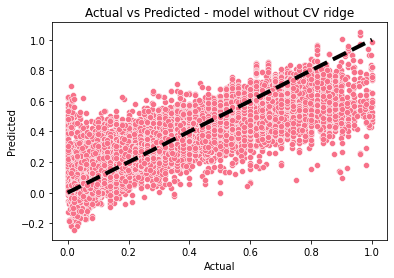

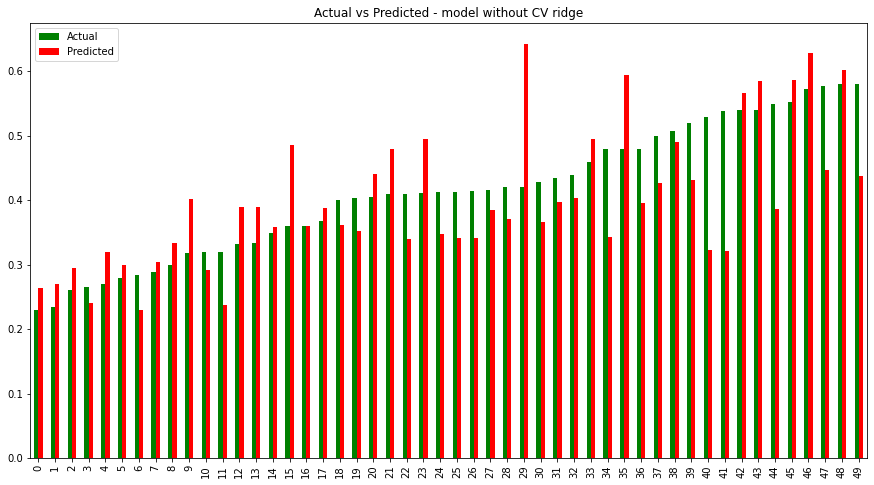

done
Now tuning Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001).
Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.6s finished


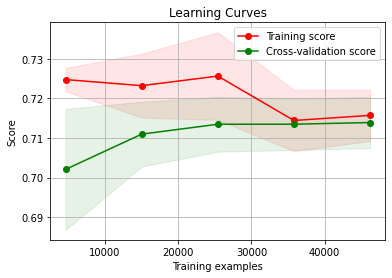

      Actual  Predicted       MAPE
0   0.229989   0.263457  14.551711
1   0.233949   0.269248  15.088219
2   0.259990   0.294737  13.364468
3   0.265291   0.239951   9.551501
4   0.269991   0.319613  18.379134
5   0.279951   0.299810   7.093701
6   0.284651   0.230245  19.113277
7   0.288772   0.304740   5.529796
8   0.299952   0.332924  10.992335
9   0.317993   0.402465  26.564265
10  0.319713   0.292242   8.592315
11  0.319953   0.237518  25.764825
12  0.331613   0.389566  17.475898
13  0.333073   0.389566  16.960931
14  0.349874   0.358734   2.532201
15  0.359794   0.484989  34.796016
16  0.359974   0.359655   0.088792
17  0.367355   0.387851   5.579559
18  0.399796   0.360802   9.753401
19  0.402676   0.353020  12.331517
20  0.404376   0.440183   8.854774
21  0.409756   0.478942  16.884478
22  0.409996   0.339155  17.278564
23  0.411176   0.494981  20.381702
24  0.412416   0.347269  15.796573
25  0.412737   0.340942  17.394871
26  0.414197   0.340942  17.686057
27  0.415997   0.385

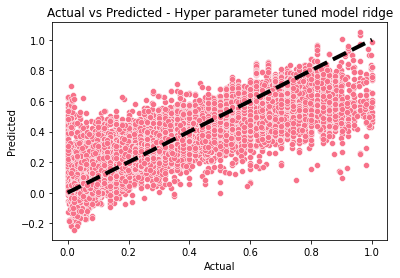

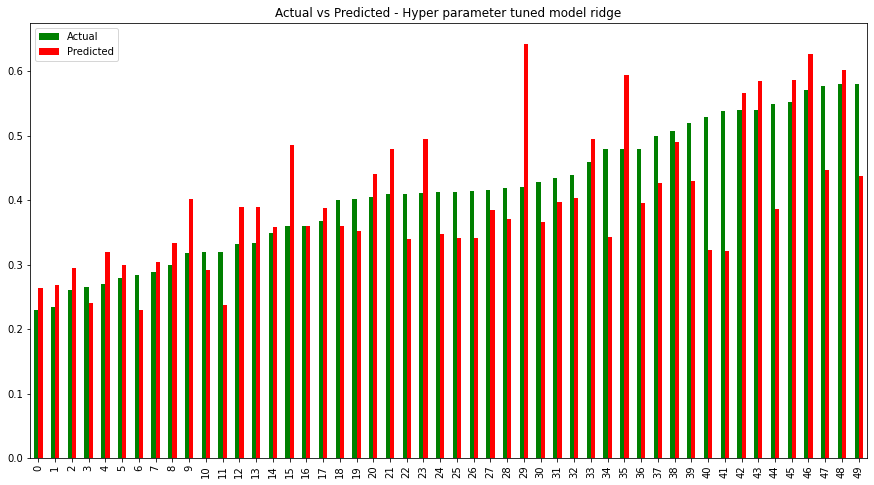

      Actual  Predicted       MAPE
0   0.229989   0.258356  12.334175
1   0.233949   0.260953  11.542414
2   0.259990   0.291256  12.025788
3   0.265291   0.232039  12.533857
4   0.269991   0.290196   7.483598
5   0.279951   0.295163   5.433838
6   0.284651   0.236442  16.936150
7   0.288772   0.303235   5.008639
8   0.299952   0.328891   9.647779
9   0.317993   0.408710  28.528179
10  0.319713   0.292051   8.651921
11  0.319953   0.235829  26.292671
12  0.331613   0.380979  14.886445
13  0.333073   0.380979  14.382829
14  0.349874   0.364780   4.260496
15  0.359794   0.472504  31.326029
16  0.359974   0.364210   1.176577
17  0.367355   0.384236   4.595449
18  0.399796   0.357235  10.645652
19  0.402676   0.348594  13.430645
20  0.404376   0.441367   9.147742
21  0.409756   0.480726  17.320022
22  0.409996   0.345287  15.782839
23  0.411176   0.488370  18.773832
24  0.412416   0.353417  14.305741
25  0.412737   0.348041  15.674864
26  0.414197   0.348041  15.972114
27  0.415997   0.390

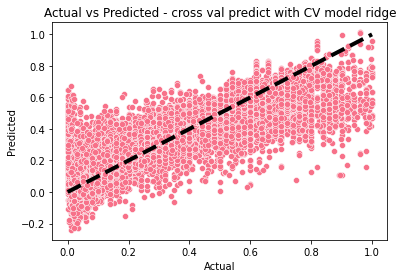

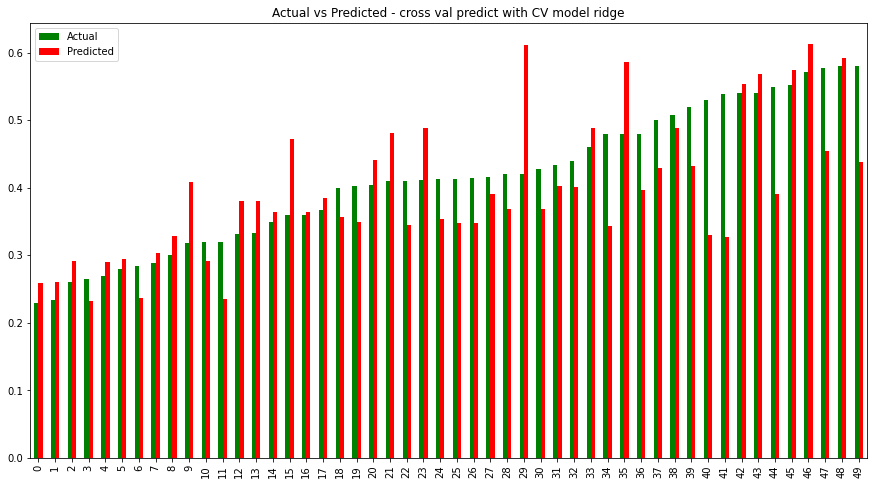

sgd...
       Actual  Predicted       MAPE
0   0.229989   0.273437  18.891334
1   0.233949   0.278845  19.190431
2   0.259990   0.305766  17.606752
3   0.265291   0.285609   7.659102
4   0.269991   0.265553   1.643522
5   0.279951   0.279018   0.333417
6   0.284651   0.285547   0.314598
7   0.288772   0.269618   6.632805
8   0.299952   0.276975   7.660061
9   0.317993   0.307927   3.165421
10  0.319713   0.278019  13.040984
11  0.319953   0.268453  16.096125
12  0.331613   0.282950  14.674704
13  0.333073   0.282950  15.048736
14  0.349874   0.280588  19.803240
15  0.359794   0.314065  12.709806
16  0.359974   0.291743  18.954470
17  0.367355   0.274584  25.253744
18  0.399796   0.284538  28.829269
19  0.402676   0.280030  30.457731
20  0.404376   0.295120  27.018562
21  0.409756   0.299690  26.861442
22  0.409996   0.287090  29.977349
23  0.411176   0.284638  30.774717
24  0.412416   0.292873  28.986029
25  0.412737   0.286790  30.515089
26  0.414197   0.286790  30.760026
27  0.415997

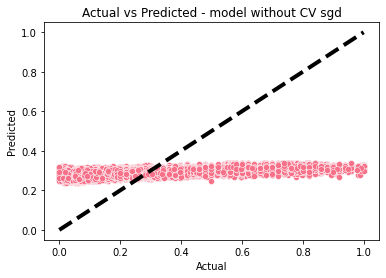

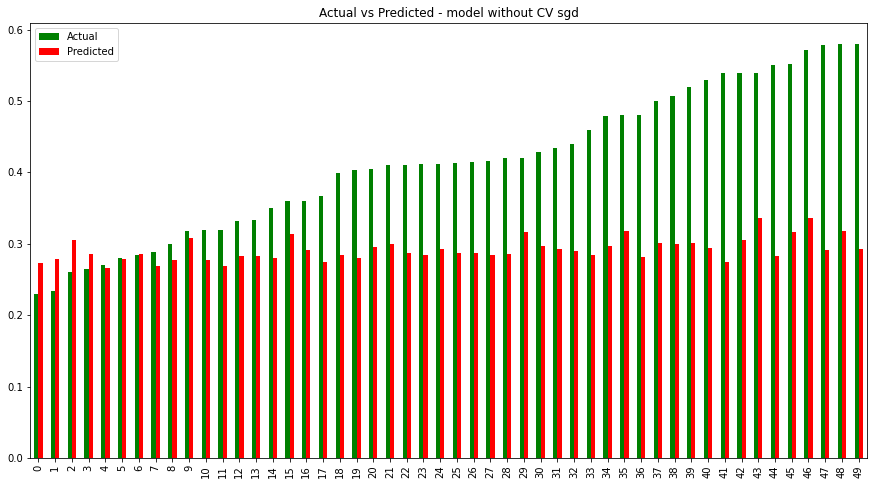

done
Now tuning SGDRegressor(alpha=1.0, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False).
Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished


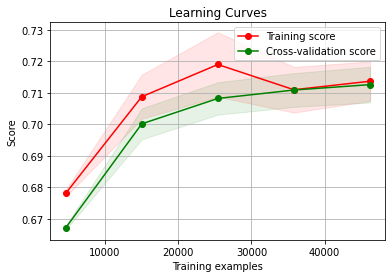

      Actual  Predicted       MAPE
0   0.229989   0.257627  12.017198
1   0.233949   0.266330  13.840875
2   0.259990   0.290760  11.835052
3   0.265291   0.238829   9.974621
4   0.269991   0.295065   9.287012
5   0.279951   0.298338   6.567936
6   0.284651   0.225621  20.737667
7   0.288772   0.302784   4.852272
8   0.299952   0.331906  10.652892
9   0.317993   0.397570  25.024825
10  0.319713   0.288206   9.854704
11  0.319953   0.232506  27.331245
12  0.331613   0.383069  15.516926
13  0.333073   0.383069  15.010547
14  0.349874   0.354752   1.394323
15  0.359794   0.483514  34.386189
16  0.359974   0.355670   1.195750
17  0.367355   0.385057   4.818992
18  0.399796   0.358445  10.343026
19  0.402676   0.350419  12.977421
20  0.404376   0.436173   7.863112
21  0.409756   0.475993  16.164924
22  0.409996   0.336907  17.826867
23  0.411176   0.489528  19.055501
24  0.412416   0.345684  16.180738
25  0.412737   0.338117  18.079122
26  0.414197   0.338117  18.367897
27  0.415997   0.382

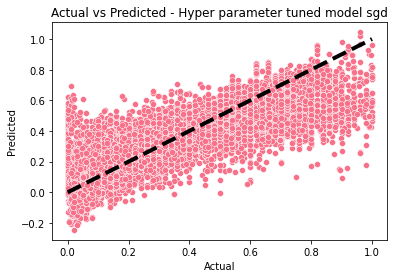

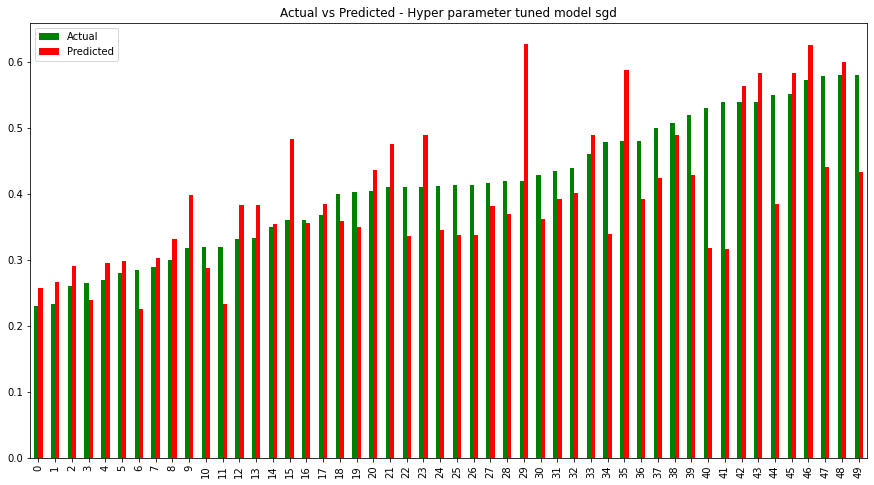

      Actual  Predicted       MAPE
0   0.229989   0.235782   2.518589
1   0.233949   0.265152  13.337300
2   0.259990   0.313664  20.644341
3   0.265291   0.256296   3.390328
4   0.269991   0.204489  24.260770
5   0.279951   0.300376   7.295878
6   0.284651   0.244220  14.203792
7   0.288772   0.300058   3.908459
8   0.299952   0.331500  10.517688
9   0.317993   0.409357  28.731686
10  0.319713   0.290430   9.158996
11  0.319953   0.225482  29.526475
12  0.331613   0.347613   4.824908
13  0.333073   0.347613   4.365398
14  0.349874   0.349942   0.019507
15  0.359794   0.513477  42.714049
16  0.359974   0.348332   3.234193
17  0.367355   0.364458   0.788661
18  0.399796   0.360511   9.826297
19  0.402676   0.347893  13.604699
20  0.404376   0.412214   1.938215
21  0.409756   0.473147  15.470207
22  0.409996   0.346759  15.423909
23  0.411176   0.452372  10.018854
24  0.412416   0.363105  11.956809
25  0.412737   0.336920  18.369243
26  0.414197   0.336920  18.656995
27  0.415997   0.373

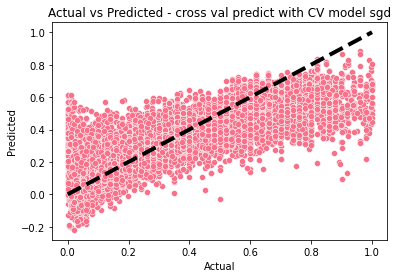

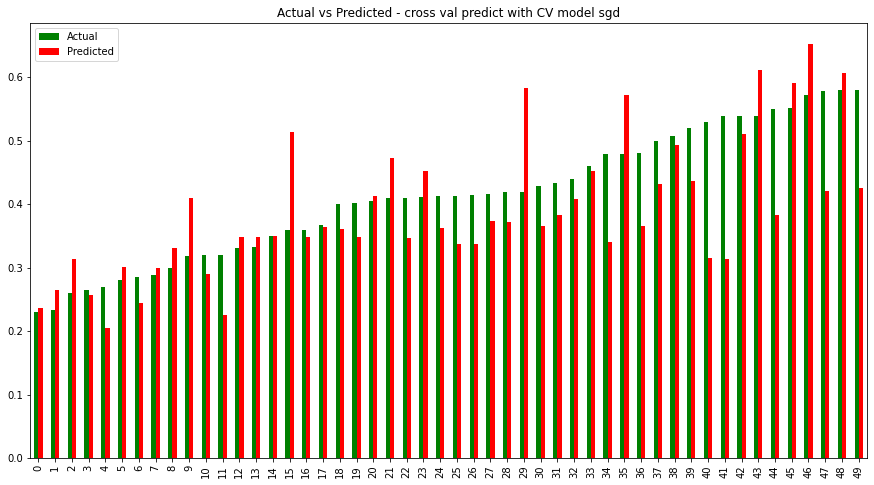

mlp-nn...
       Actual  Predicted       MAPE
0   0.229989   0.251081   9.170837
1   0.233949   0.246325   5.289983
2   0.259990   0.269982   3.842895
3   0.265291   0.187737  29.233375
4   0.269991   0.253629   6.060243
5   0.279951   0.278872   0.385338
6   0.284651   0.281102   1.247041
7   0.288772   0.311741   7.954352
8   0.299952   0.313123   4.391027
9   0.317993   0.348333   9.541319
10  0.319713   0.298002   6.790755
11  0.319953   0.235991  26.241800
12  0.331613   0.399402  20.441980
13  0.333073   0.399402  19.914012
14  0.349874   0.360687   3.090551
15  0.359794   0.451587  25.512506
16  0.359974   0.439619  22.125032
17  0.367355   0.397433   8.187761
18  0.399796   0.398036   0.440116
19  0.402676   0.368779   8.418072
20  0.404376   0.518324  28.178766
21  0.409756   0.469227  14.513544
22  0.409996   0.503676  22.848928
23  0.411176   0.492883  19.871489
24  0.412416   0.526226  27.595729
25  0.412737   0.497857  20.623377
26  0.414197   0.497857  20.198175
27  0.415

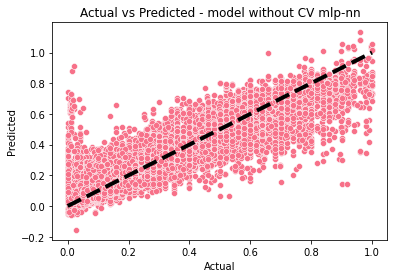

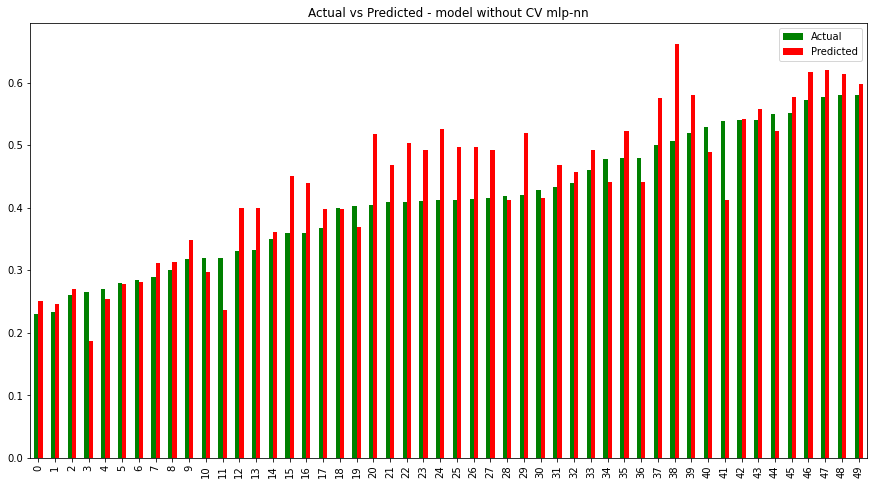

done
Now tuning MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(80, 10), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=30, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False).
Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    8.9s finished


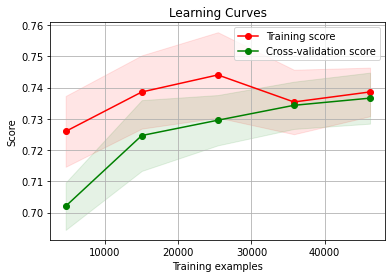

      Actual  Predicted       MAPE
0   0.229989   0.233356   1.463895
1   0.233949   0.249739   6.749269
2   0.259990   0.272968   4.991573
3   0.265291   0.233284  12.064595
4   0.269991   0.223044  17.388188
5   0.279951   0.297523   6.276871
6   0.284651   0.230303  19.092868
7   0.288772   0.313118   8.431053
8   0.299952   0.335924  11.992674
9   0.317993   0.395530  24.383435
10  0.319713   0.285529  10.691904
11  0.319953   0.224277  29.902969
12  0.331613   0.385138  16.140809
13  0.333073   0.385138  15.631695
14  0.349874   0.365031   4.332220
15  0.359794   0.476257  32.369224
16  0.359974   0.360160   0.051607
17  0.367355   0.399706   8.806635
18  0.399796   0.372638   6.792999
19  0.402676   0.360031  10.590319
20  0.404376   0.465465  15.107047
21  0.409756   0.492027  20.077991
22  0.409996   0.374431   8.674502
23  0.411176   0.511913  24.499532
24  0.412416   0.385185   6.602872
25  0.412737   0.343954  16.665096
26  0.414197   0.343954  16.958854
27  0.415997   0.405

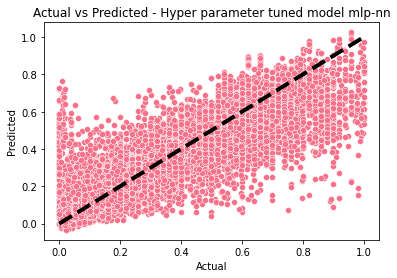

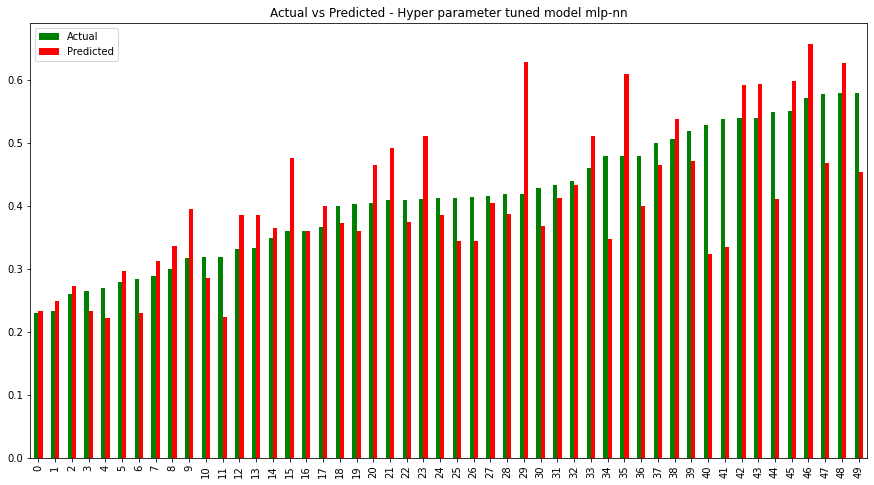

      Actual  Predicted       MAPE
0   0.229989   0.238080   3.518026
1   0.233949   0.242763   3.767359
2   0.259990   0.275146   5.829318
3   0.265291   0.229347  13.548952
4   0.269991   0.150862  44.123428
5   0.279951   0.293379   4.796346
6   0.284651   0.238449  16.231093
7   0.288772   0.314233   8.816989
8   0.299952   0.332524  10.859212
9   0.317993   0.383374  20.560720
10  0.319713   0.289803   9.355174
11  0.319953   0.228254  28.660185
12  0.331613   0.366731  10.590094
13  0.333073   0.366731  10.105312
14  0.349874   0.370847   5.994544
15  0.359794   0.456742  26.945228
16  0.359974   0.356681   0.915036
17  0.367355   0.390771   6.374227
18  0.399796   0.364567   8.811713
19  0.402676   0.354430  11.981283
20  0.404376   0.445753  10.232195
21  0.409756   0.483314  17.951644
22  0.409996   0.373001   9.023342
23  0.411176   0.491610  19.561846
24  0.412416   0.381648   7.460548
25  0.412737   0.341702  17.210604
26  0.414197   0.341702  17.502440
27  0.415997   0.400

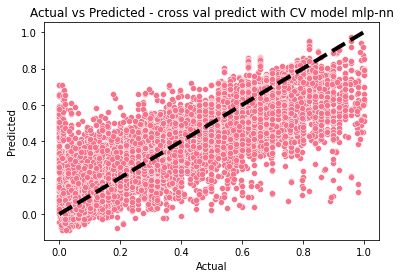

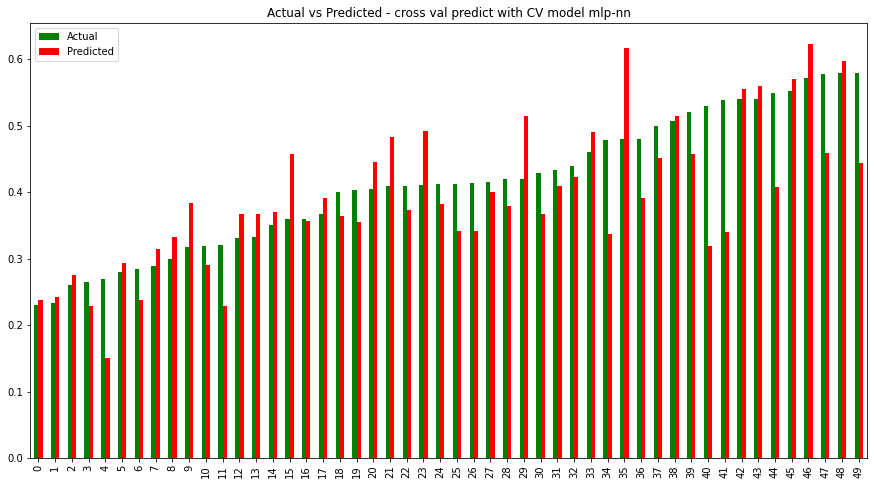

gbm...
       Actual  Predicted       MAPE
0   0.229989   0.221906   3.514706
1   0.233949   0.248697   6.303612
2   0.259990   0.205801  20.842766
3   0.265291   0.158877  40.111906
4   0.269991   0.273559   1.321714
5   0.279951   0.272426   2.687889
6   0.284651   0.280054   1.614956
7   0.288772   0.312556   8.236479
8   0.299952   0.286366   4.529298
9   0.317993   0.283857  10.734613
10  0.319713   0.321692   0.618963
11  0.319953   0.237130  25.885792
12  0.331613   0.389039  17.317044
13  0.333073   0.389039  16.802774
14  0.349874   0.392337  12.136618
15  0.359794   0.511023  42.032016
16  0.359974   0.326487   9.302813
17  0.367355   0.419870  14.295417
18  0.399796   0.412350   3.140137
19  0.402676   0.406047   0.837003
20  0.404376   0.552023  36.512126
21  0.409756   0.458595  11.918903
22  0.409996   0.459372  12.042836
23  0.411176   0.532812  29.582444
24  0.412416   0.460421  11.639770
25  0.412737   0.334454  18.966808
26  0.414197   0.334454  19.252453
27  0.415997

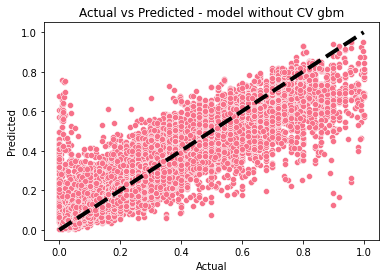

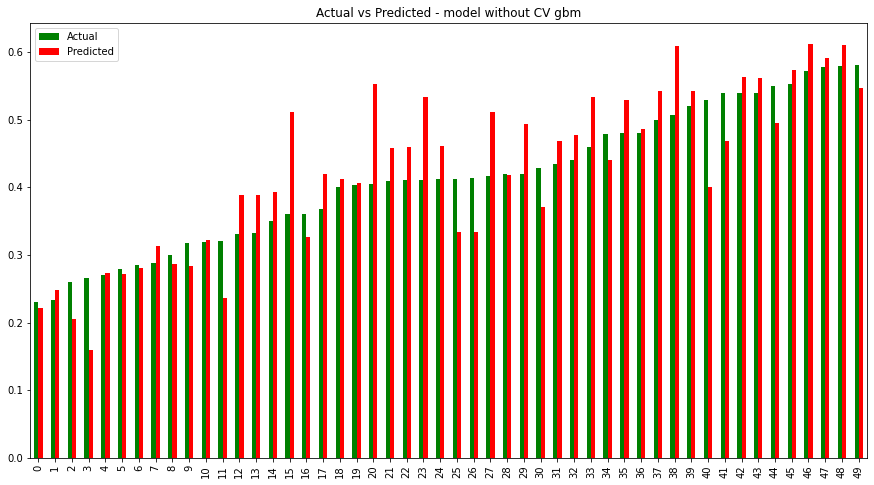

done
Now tuning GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=30, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False).
Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    8.0s finished


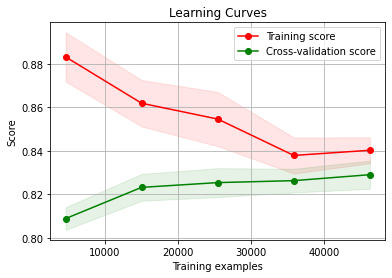

      Actual  Predicted       MAPE
0   0.229989   0.216176   6.006077
1   0.233949   0.234950   0.427649
2   0.259990   0.235179   9.543241
3   0.265291   0.169419  36.138282
4   0.269991   0.228866  15.231835
5   0.279951   0.272131   2.793464
6   0.284651   0.204687  28.092135
7   0.288772   0.296262   2.593816
8   0.299952   0.301395   0.480968
9   0.317993   0.299496   5.816560
10  0.319713   0.326120   2.003975
11  0.319953   0.250325  21.762026
12  0.331613   0.375619  13.270260
13  0.333073   0.375619  12.773729
14  0.349874   0.384039   9.764850
15  0.359794   0.472668  31.371580
16  0.359974   0.327004   9.159007
17  0.367355   0.411607  12.046096
18  0.399796   0.426788   6.751391
19  0.402676   0.407872   1.290394
20  0.404376   0.529452  30.930617
21  0.409756   0.400143   2.346156
22  0.409996   0.389829   4.918894
23  0.411176   0.546740  32.969726
24  0.412416   0.398239   3.437582
25  0.412737   0.448734   8.721605
26  0.414197   0.448734   8.338357
27  0.415997   0.489

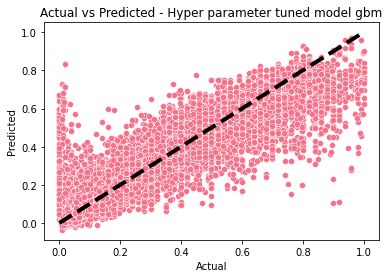

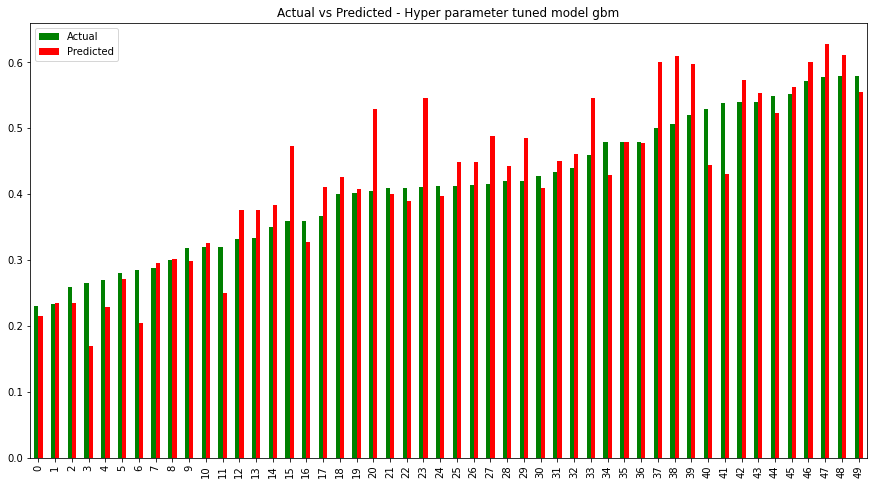

      Actual  Predicted       MAPE
0   0.229989   0.219951   4.364798
1   0.233949   0.277106  18.447189
2   0.259990   0.196297  24.498341
3   0.265291   0.161223  39.227958
4   0.269991   0.241249  10.645511
5   0.279951   0.295104   5.412729
6   0.284651   0.258084   9.333313
7   0.288772   0.343663  19.008718
8   0.299952   0.304138   1.395644
9   0.317993   0.310496   2.357357
10  0.319713   0.327686   2.493858
11  0.319953   0.242101  24.332194
12  0.331613   0.393209  18.574465
13  0.333073   0.393209  18.054682
14  0.349874   0.341005   2.535049
15  0.359794   0.458072  27.315061
16  0.359974   0.330128   8.291146
17  0.367355   0.442827  20.544849
18  0.399796   0.442208  10.608534
19  0.402676   0.381942   5.149004
20  0.404376   0.539872  33.507345
21  0.409756   0.463739  13.174373
22  0.409996   0.413119   0.761622
23  0.411176   0.490386  19.264058
24  0.412416   0.434153   5.270553
25  0.412737   0.409645   0.749114
26  0.414197   0.409645   1.098977
27  0.415997   0.498

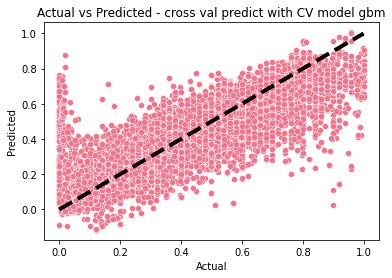

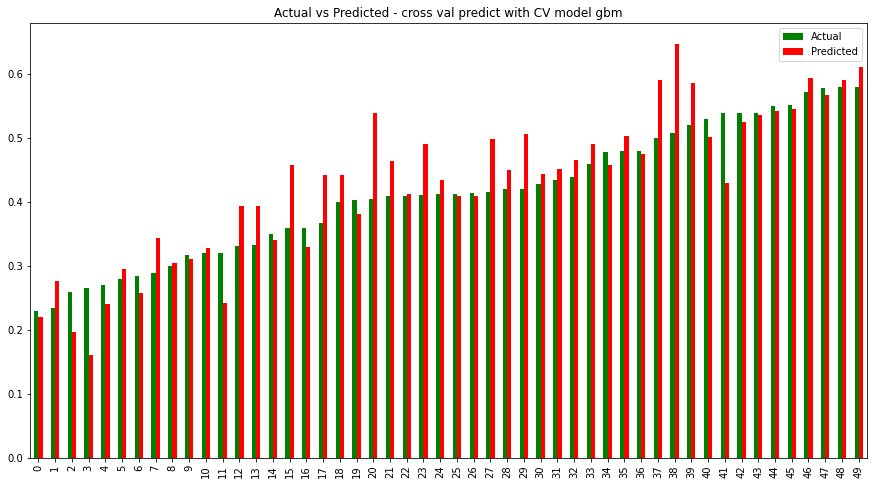

      Actual  Predicted       MAPE
0   0.229989   0.221187   3.827028
1   0.233949   0.207070  11.489407
2   0.259990   0.227400  12.535392
3   0.265291   0.165989  37.431128
4   0.269991   0.206637  23.465299
5   0.279951   0.269196   3.841764
6   0.284651   0.271100   4.760548
7   0.288772   0.325838  12.835898
8   0.299952   0.288095   3.953074
9   0.317993   0.328241   3.222757
10  0.319713   0.305371   4.485899
11  0.319953   0.250486  21.711646
12  0.331613   0.431803  30.212679
13  0.333073   0.431803  29.641880
14  0.349874   0.407638  16.509841
15  0.359794   0.513030  42.589744
16  0.359974   0.350442   2.648202
17  0.367355   0.422926  15.127515
18  0.399796   0.404244   1.112482
19  0.402676   0.391633   2.742497
20  0.404376   0.553708  36.929020
21  0.409756   0.463409  13.093778
22  0.409996   0.459993  12.194431
23  0.411176   0.559376  36.042921
24  0.412416   0.460806  11.733141
25  0.412737   0.369679  10.432167
26  0.414197   0.369679  10.747897
27  0.415997   0.531

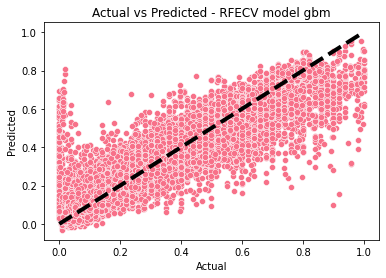

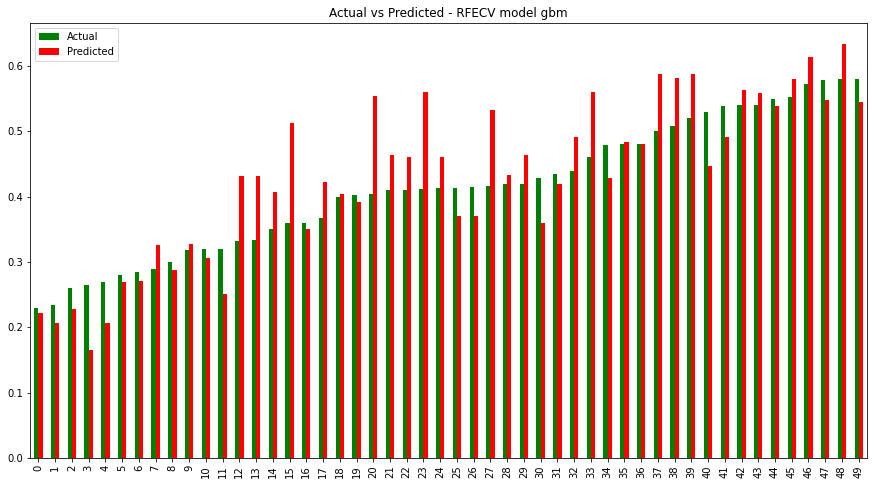

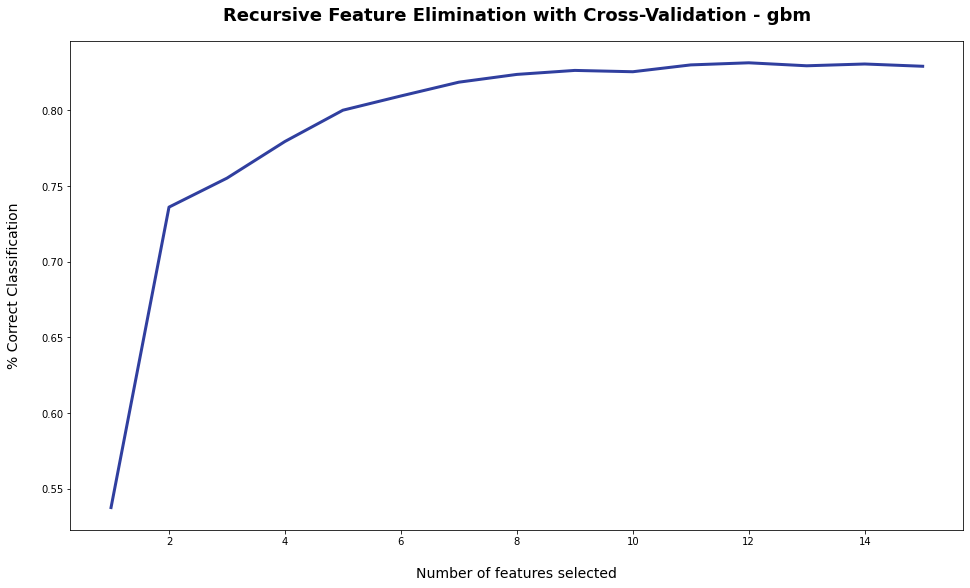

Optimal number of features: 12
xgb...
       Actual  Predicted       MAPE
0   0.229989   0.234260   1.856811
1   0.233949   0.244652   4.574566
2   0.259990   0.212266  18.356320
3   0.265291   0.162733  38.658483
4   0.269991   0.280290   3.814828
5   0.279951   0.267733   4.364283
6   0.284651   0.282040   0.917314
7   0.288772   0.321685  11.397773
8   0.299952   0.285280   4.891323
9   0.317993   0.293786   7.612391
10  0.319713   0.305320   4.501807
11  0.319953   0.240552  24.816435
12  0.331613   0.371870  12.139568
13  0.333073   0.371870  11.647994
14  0.349874   0.397256  13.542502
15  0.359794   0.503590  39.965931
16  0.359974   0.334484   7.081192
17  0.367355   0.427856  16.469541
18  0.399796   0.411425   2.908809
19  0.402676   0.405336   0.660597
20  0.404376   0.559986  38.481525
21  0.409756   0.468796  14.408462
22  0.409996   0.460939  12.425095
23  0.411176   0.531196  29.189306
24  0.412416   0.465243  12.809122
25  0.412737   0.343026  16.889874
26  0.414197   0

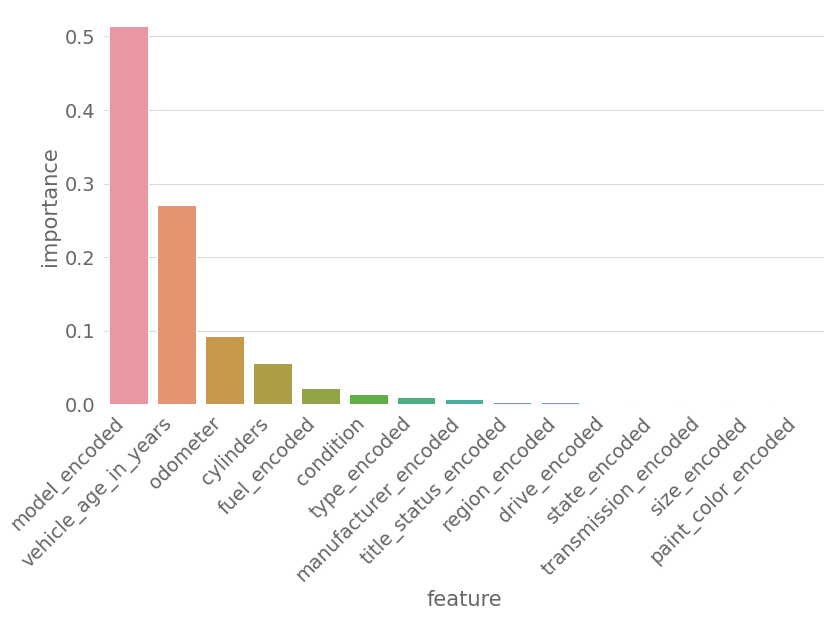

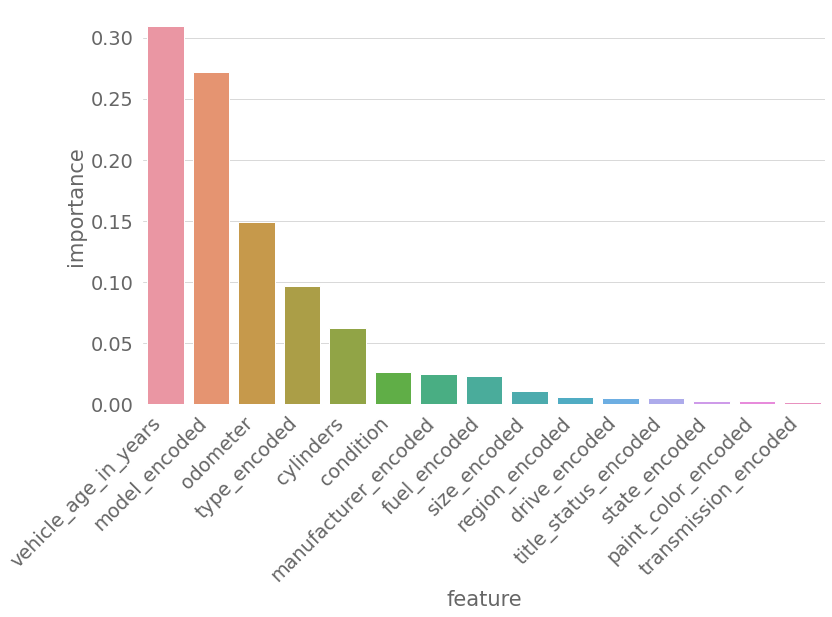

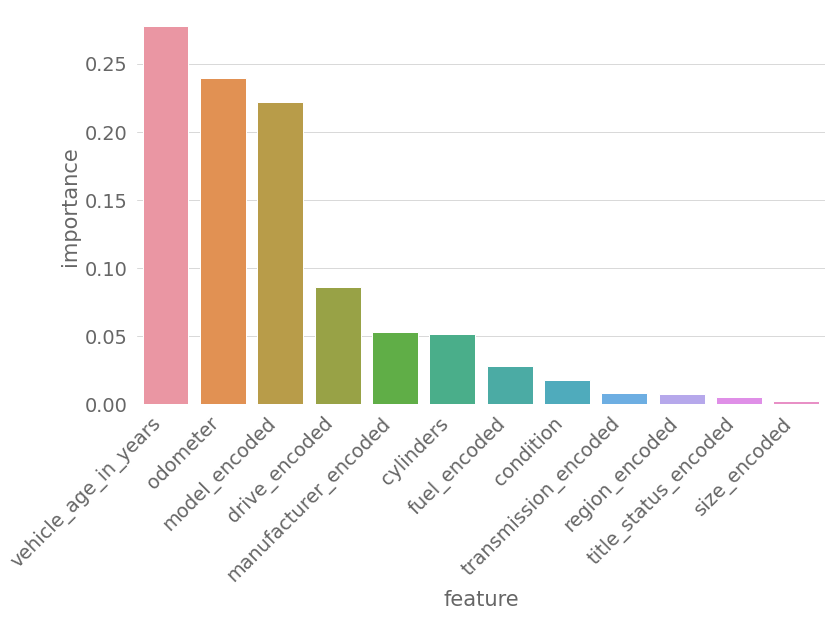

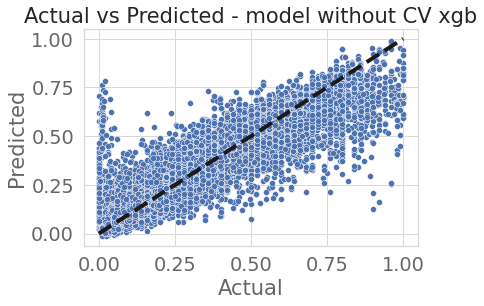

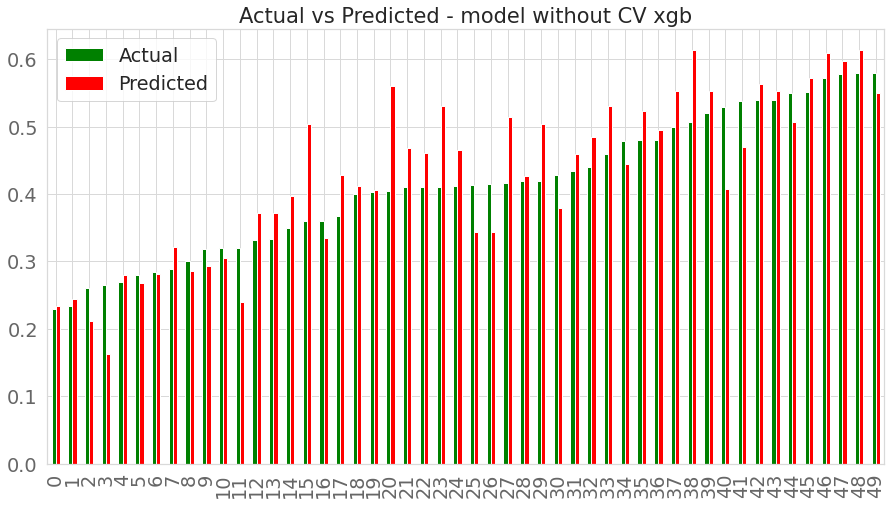

done
Now tuning XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=150,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=30, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=True, subsample=1, verbosity=1).
Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   23.5s finished


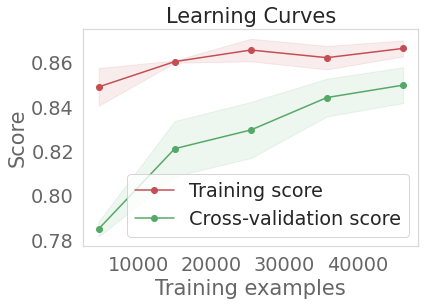

      Actual  Predicted       MAPE
0   0.229989   0.237980   3.474298
1   0.233949   0.249705   6.734849
2   0.259990   0.250454   3.668024
3   0.265291   0.186495  29.701607
4   0.269991   0.218920  18.915780
5   0.279951   0.282645   0.962235
6   0.284651   0.279025   1.976561
7   0.288772   0.275428   4.620923
8   0.299952   0.273674   8.760780
9   0.317993   0.327292   2.924321
10  0.319713   0.306954   3.990788
11  0.319953   0.267172  16.496542
12  0.331613   0.378658  14.186662
13  0.333073   0.378658  13.686113
14  0.349874   0.381144   8.937484
15  0.359794   0.475737  32.224562
16  0.359974   0.391659   8.801885
17  0.367355   0.385764   5.011252
18  0.399796   0.430105   7.581037
19  0.402676   0.397625   1.254318
20  0.404376   0.563367  39.317498
21  0.409756   0.470715  14.876724
22  0.409996   0.482045  17.573070
23  0.411176   0.455128  10.689259
24  0.412416   0.493894  19.756073
25  0.412737   0.425800   3.165127
26  0.414197   0.425800   2.801466
27  0.415997   0.588

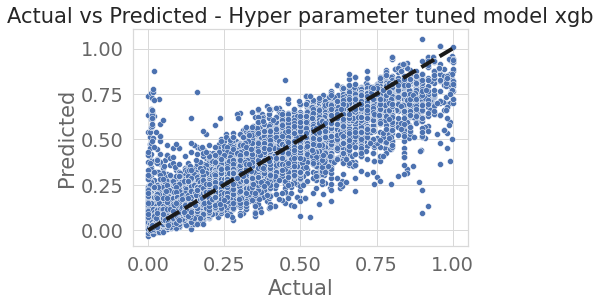

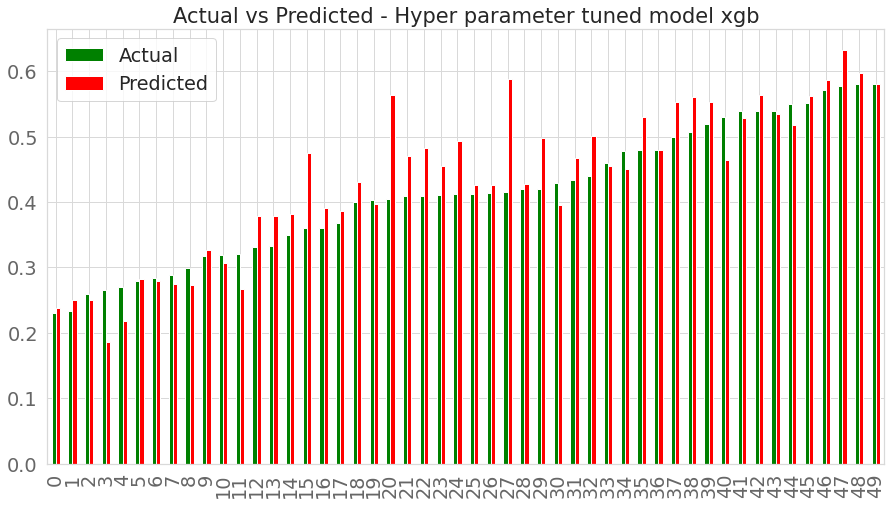

      Actual  Predicted       MAPE
0   0.229989   0.212210   7.730450
1   0.233949   0.239502   2.373418
2   0.259990   0.192408  25.994376
3   0.265291   0.203178  23.413084
4   0.269991   0.202682  24.929884
5   0.279951   0.277501   0.875356
6   0.284651   0.246320  13.466245
7   0.288772   0.301625   4.451166
8   0.299952   0.295460   1.497676
9   0.317993   0.362317  13.938668
10  0.319713   0.310158   2.988475
11  0.319953   0.232686  27.275005
12  0.331613   0.448416  35.222692
13  0.333073   0.448416  34.629930
14  0.349874   0.375740   7.393057
15  0.359794   0.508486  41.326721
16  0.359974   0.347461   3.476262
17  0.367355   0.412824  12.377528
18  0.399796   0.399800   0.000936
19  0.402676   0.384406   4.537076
20  0.404376   0.493440  22.025060
21  0.409756   0.517933  26.400199
22  0.409996   0.448795   9.463103
23  0.411176   0.474979  15.516997
24  0.412416   0.448795   8.820764
25  0.412737   0.352709  14.543800
26  0.414197   0.352709  14.845037
27  0.415997   0.492

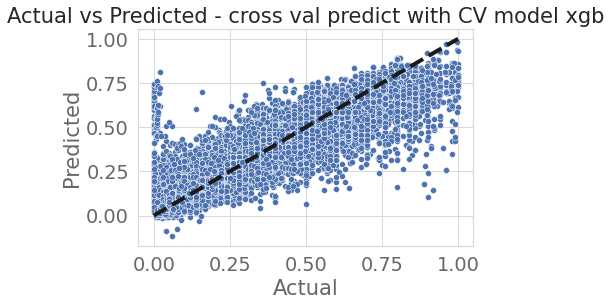

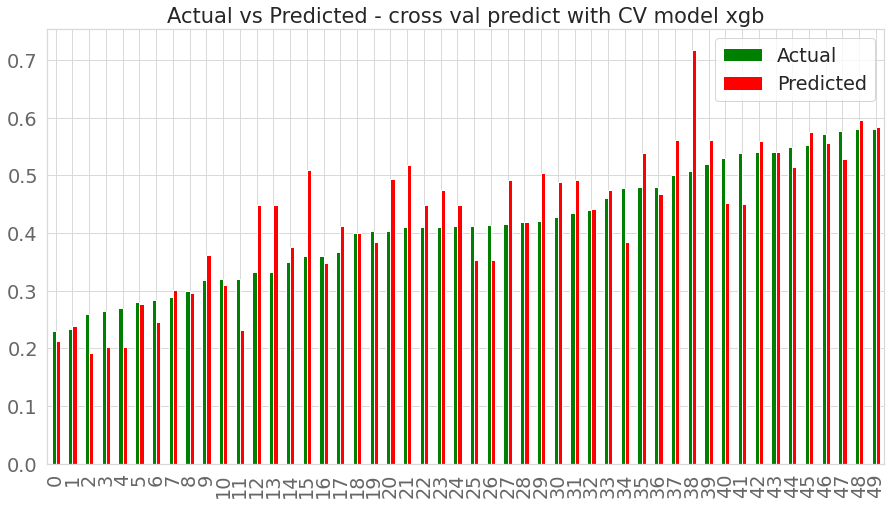

      Actual  Predicted       MAPE
0   0.229989   0.254799  10.787522
1   0.233949   0.264217  12.937825
2   0.259990   0.255173   1.852835
3   0.265291   0.208546  21.389734
4   0.269991   0.255810   5.252319
5   0.279951   0.282750   0.999920
6   0.284651   0.258144   9.312304
7   0.288772   0.302376   4.711033
8   0.299952   0.298698   0.418093
9   0.317993   0.329863   3.732900
10  0.319713   0.308349   3.554463
11  0.319953   0.288667   9.778275
12  0.331613   0.418592  26.228915
13  0.333073   0.418592  25.675579
14  0.349874   0.392926  12.304988
15  0.359794   0.455265  26.534781
16  0.359974   0.383745   6.603460
17  0.367355   0.407938  11.047478
18  0.399796   0.466447  16.671313
19  0.402676   0.422307   4.874993
20  0.404376   0.598187  47.928238
21  0.409756   0.453919  10.777720
22  0.409996   0.497474  21.336271
23  0.411176   0.458549  11.521279
24  0.412416   0.502282  21.790037
25  0.412737   0.413348   0.148174
26  0.414197   0.413348   0.204852
27  0.415997   0.597

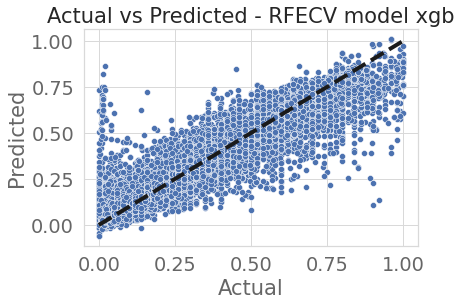

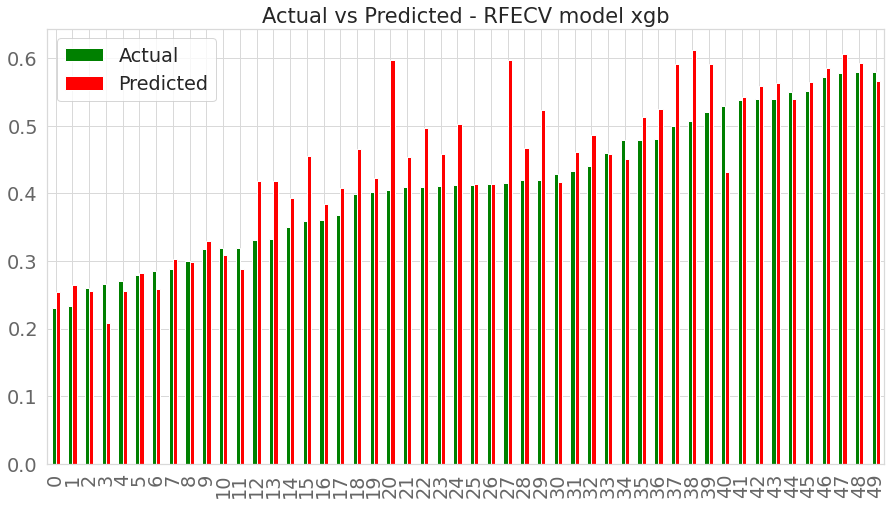

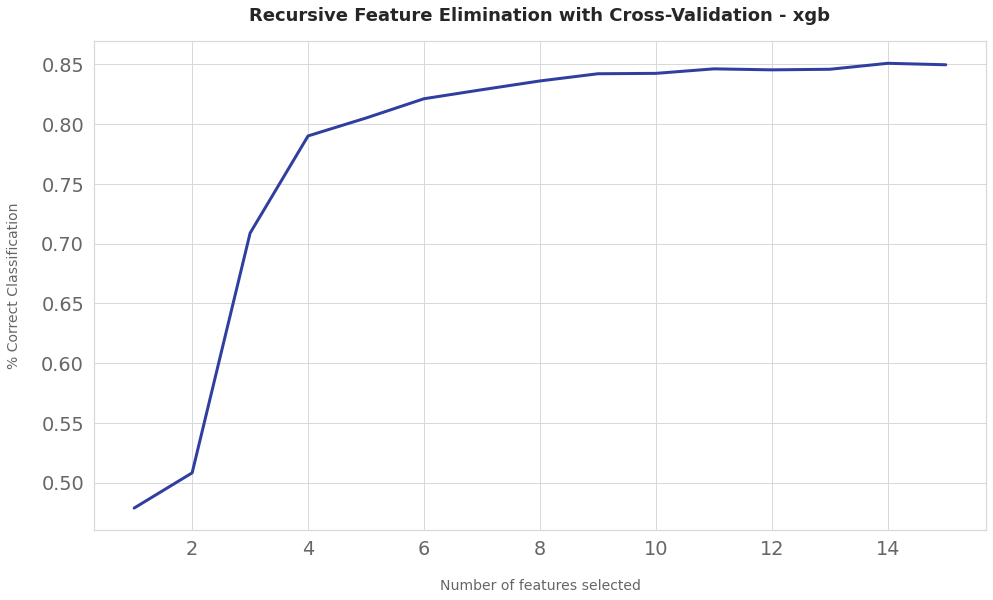

Optimal number of features: 14
bagging...
       Actual  Predicted          MAPE
0   0.229989   0.241800  5.135229e+00
1   0.233949   0.233170  3.332763e-01
2   0.259990   0.189534  2.709952e+01
3   0.265291   0.195300  2.638269e+01
4   0.269991   0.259816  3.768427e+00
5   0.279951   0.304617  8.810727e+00
6   0.284651   0.255420  1.026935e+01
7   0.288772   0.229327  2.058540e+01
8   0.299952   0.270591  9.788624e+00
9   0.317993   0.353877  1.128467e+01
10  0.319713   0.278831  1.278699e+01
11  0.319953   0.205950  3.563106e+01
12  0.331613   0.331873  7.820667e-02
13  0.333073   0.331873  3.604956e-01
14  0.349874   0.353755  1.109301e+00
15  0.359794   0.394018  9.512109e+00
16  0.359974   0.362270  6.378486e-01
17  0.367355   0.291863  2.055004e+01
18  0.399796   0.421202  5.354278e+00
19  0.402676   0.417653  3.719267e+00
20  0.404376   0.567415  4.031853e+01
21  0.409756   0.379458  7.394354e+00
22  0.409996   0.511506  2.475877e+01
23  0.411176   0.453126  1.020228e+01
24  0.4

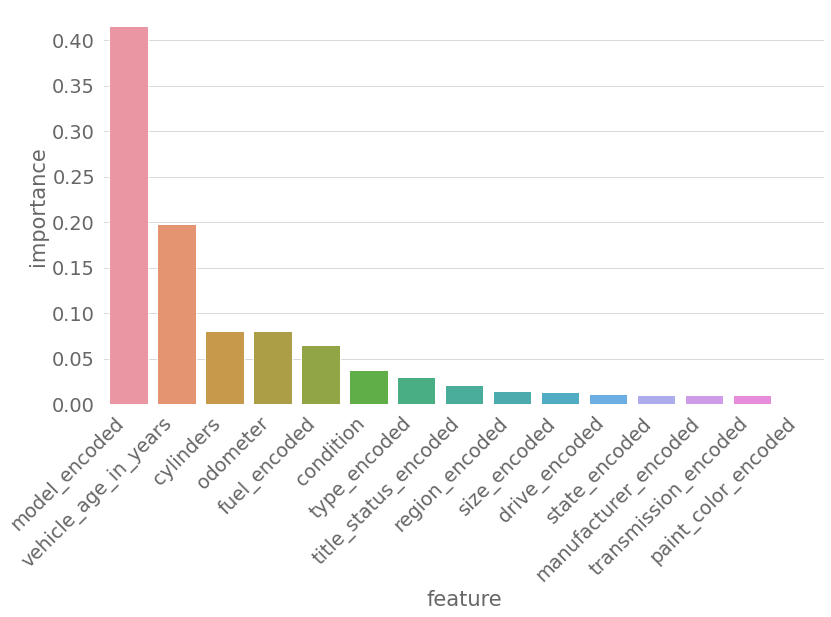

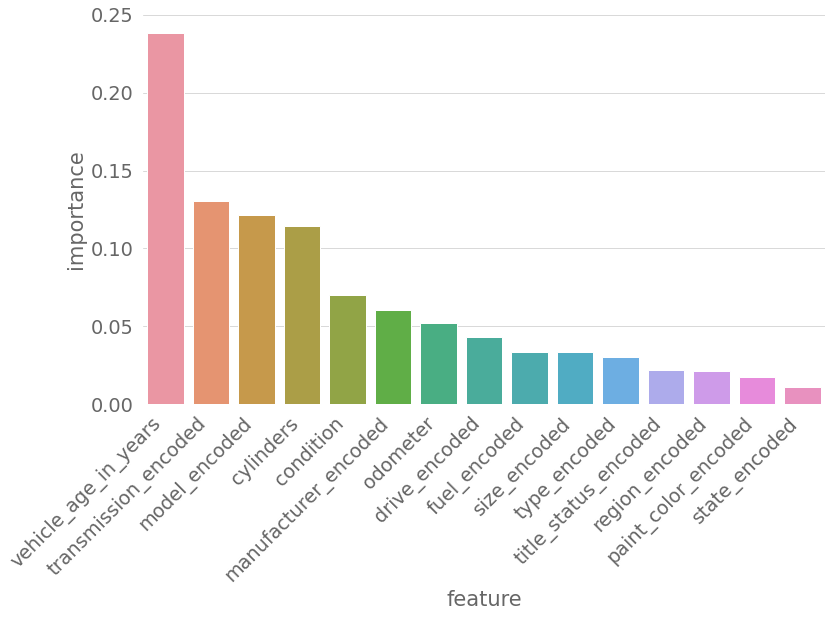

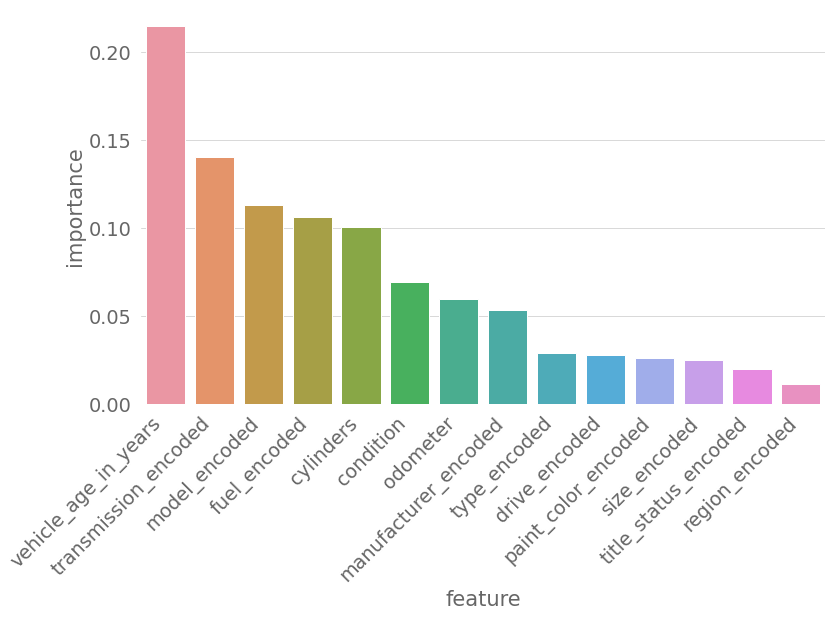

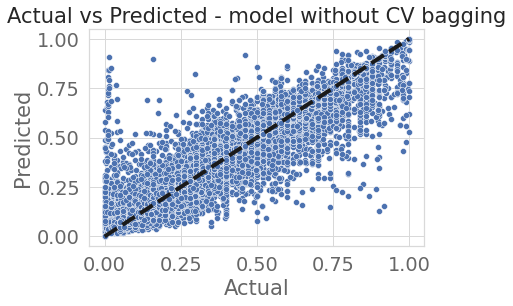

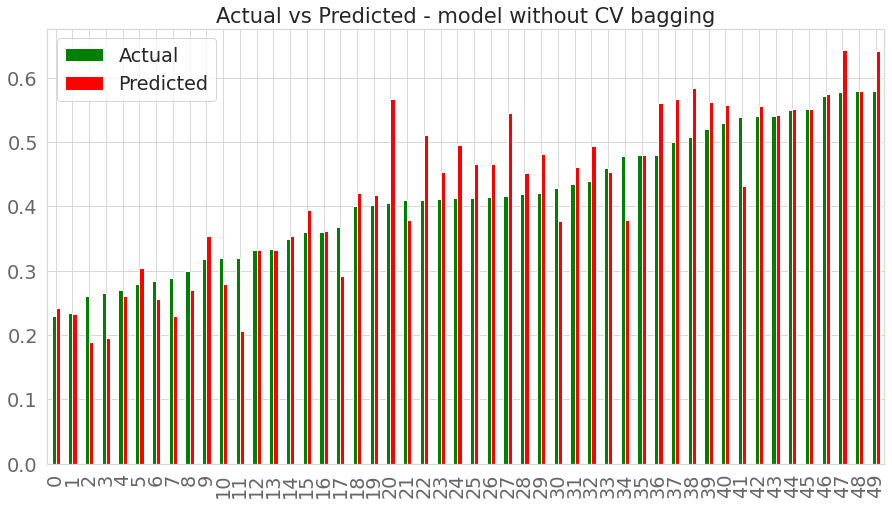

done
Now tuning BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False).
Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.3min finished


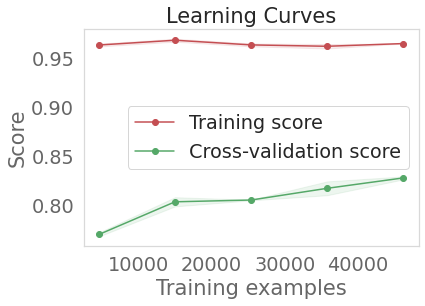

      Actual  Predicted       MAPE
0   0.229989   0.266383  15.824005
1   0.233949   0.244106   4.341299
2   0.259990   0.263356   1.294453
3   0.265291   0.211315  20.345801
4   0.269991   0.233177  13.635256
5   0.279951   0.256188   8.488210
6   0.284651   0.222071  21.984973
7   0.288772   0.272593   5.602503
8   0.299952   0.289109   3.614825
9   0.317993   0.363019  14.159616
10  0.319713   0.263501  17.581922
11  0.319953   0.223494  30.147730
12  0.331613   0.344620   3.922227
13  0.333073   0.344620   3.466674
14  0.349874   0.334319   4.445991
15  0.359794   0.423664  17.751702
16  0.359974   0.323343  10.175995
17  0.367355   0.352897   3.935565
18  0.399796   0.357370  10.611852
19  0.402676   0.358298  11.020911
20  0.404376   0.434553   7.462675
21  0.409756   0.407682   0.506210
22  0.409996   0.356739  12.989610
23  0.411176   0.449882   9.413385
24  0.412416   0.379481   7.985932
25  0.412737   0.331599  19.658486
26  0.414197   0.331599  19.941692
27  0.415997   0.387

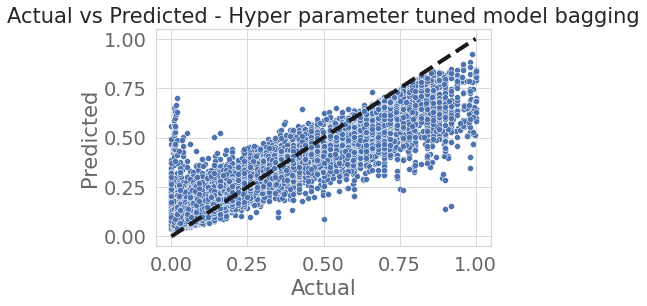

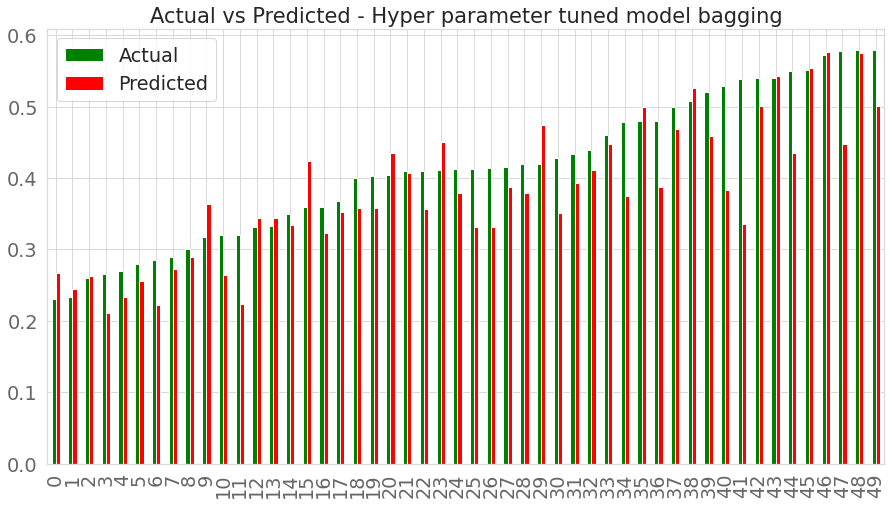

      Actual  Predicted       MAPE
0   0.229989   0.241196   4.872573
1   0.233949   0.286565  22.490315
2   0.259990   0.286535  10.209715
3   0.265291   0.231455  12.753992
4   0.269991   0.228290  15.445281
5   0.279951   0.278265   0.602496
6   0.284651   0.242834  14.690661
7   0.288772   0.289149   0.130710
8   0.299952   0.293843   2.036715
9   0.317993   0.355456  11.781108
10  0.319713   0.274100  14.266831
11  0.319953   0.245799  23.176326
12  0.331613   0.375345  13.187656
13  0.333073   0.375345  12.691487
14  0.349874   0.314355  10.151835
15  0.359794   0.479073  33.152014
16  0.359974   0.373297   3.701059
17  0.367355   0.371173   1.039300
18  0.399796   0.386719   3.270819
19  0.402676   0.343761  14.630892
20  0.404376   0.412608   2.035805
21  0.409756   0.439956   7.370233
22  0.409996   0.366868  10.519225
23  0.411176   0.438085   6.544398
24  0.412416   0.369993  10.286456
25  0.412737   0.373877   9.415054
26  0.414197   0.373877   9.734370
27  0.415997   0.400

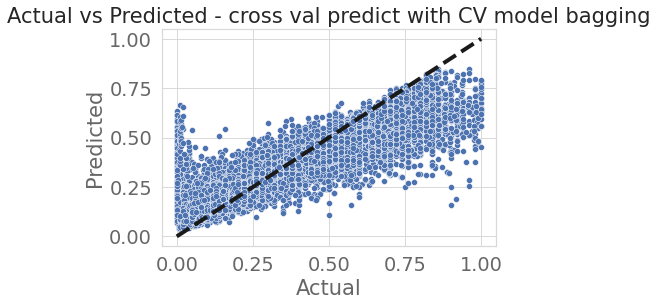

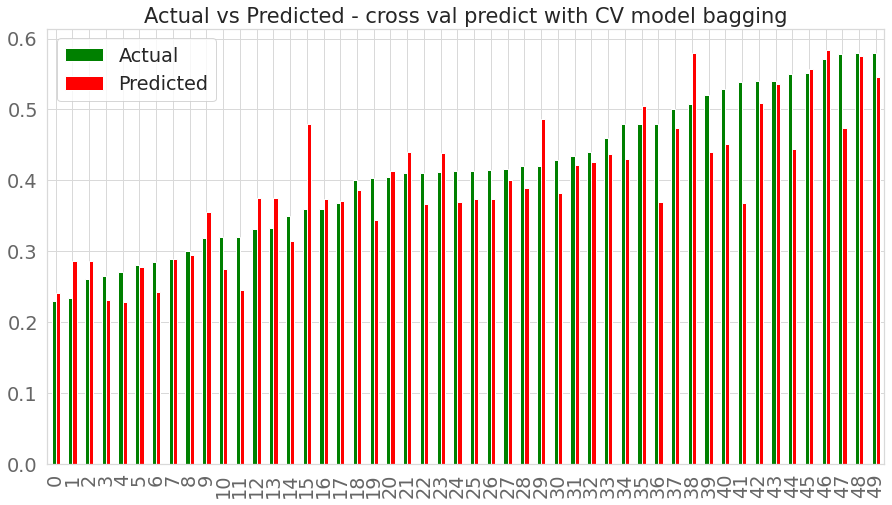

ada boost...
       Actual  Predicted       MAPE
0   0.229989   0.269042  16.980397
1   0.233949   0.269042  15.000221
2   0.259990   0.229463  11.741744
3   0.265291   0.238066  10.262261
4   0.269991   0.269042   0.351316
5   0.279951   0.281106   0.412638
6   0.284651   0.238066  16.365840
7   0.288772   0.378271  30.993266
8   0.299952   0.281106   6.282877
9   0.317993   0.264543  16.808417
10  0.319713   0.286189  10.485750
11  0.319953   0.274904  14.079969
12  0.331613   0.515773  55.534375
13  0.333073   0.515773  54.852576
14  0.349874   0.378271   8.116433
15  0.359794   0.535139  48.734700
16  0.359974   0.269042  25.260718
17  0.367355   0.394179   7.301903
18  0.399796   0.394179   1.405071
19  0.402676   0.394179   2.110264
20  0.404376   0.520392  28.690134
21  0.409756   0.499247  21.840031
22  0.409996   0.410270   0.066829
23  0.411176   0.515773  25.438269
24  0.412416   0.410270   0.520372
25  0.412737   0.294700  28.598471
26  0.414197   0.294700  28.850164
27  0.

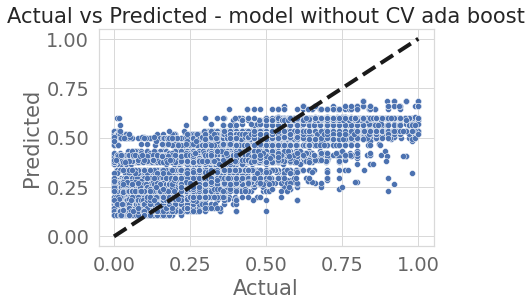

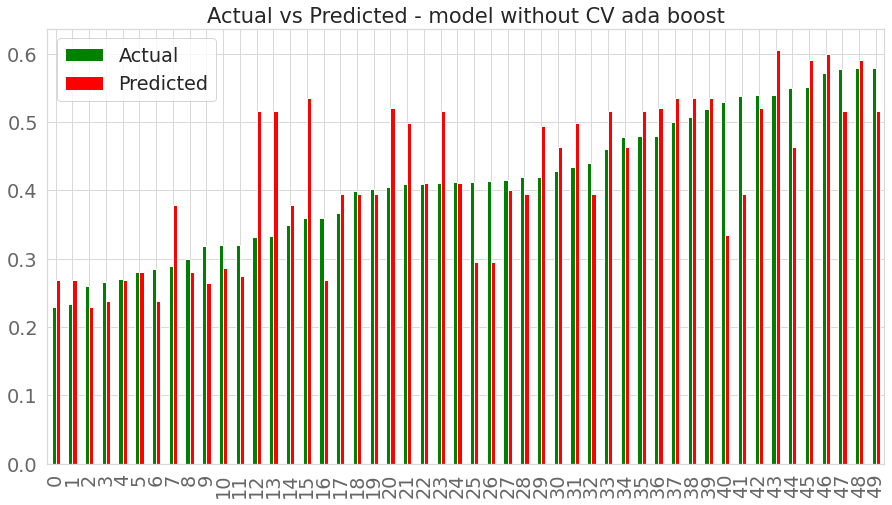

done
Now tuning AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None).
Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   19.8s finished


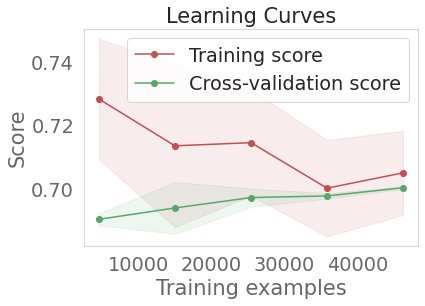

      Actual  Predicted       MAPE
0   0.229989   0.200704  12.733302
1   0.233949   0.203857  12.862819
2   0.259990   0.221347  14.863565
3   0.265291   0.233730  11.896637
4   0.269991   0.281033   4.089804
5   0.279951   0.252107   9.946168
6   0.284651   0.247520  13.044657
7   0.288772   0.290136   0.472546
8   0.299952   0.253623  15.445517
9   0.317993   0.241282  24.123569
10  0.319713   0.280900  12.139944
11  0.319953   0.248892  22.209817
12  0.331613   0.494817  49.214974
13  0.333073   0.494817  48.560876
14  0.349874   0.265462  24.126460
15  0.359794   0.538093  49.555703
16  0.359974   0.262440  27.094845
17  0.367355   0.391753   6.641699
18  0.399796   0.388936   2.716380
19  0.402676   0.384930   4.406939
20  0.404376   0.507416  25.481291
21  0.409756   0.454968  11.033727
22  0.409996   0.418155   1.989829
23  0.411176   0.502053  22.101660
24  0.412416   0.418155   1.391343
25  0.412737   0.227036  44.992581
26  0.414197   0.227036  45.186484
27  0.415997   0.418

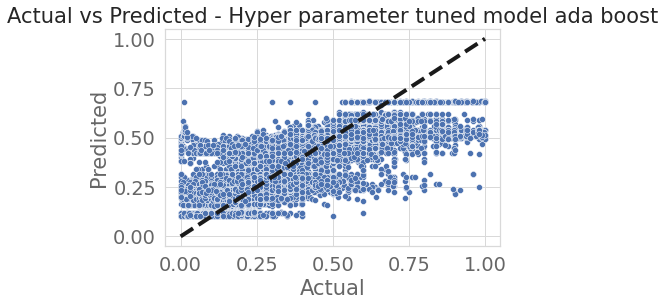

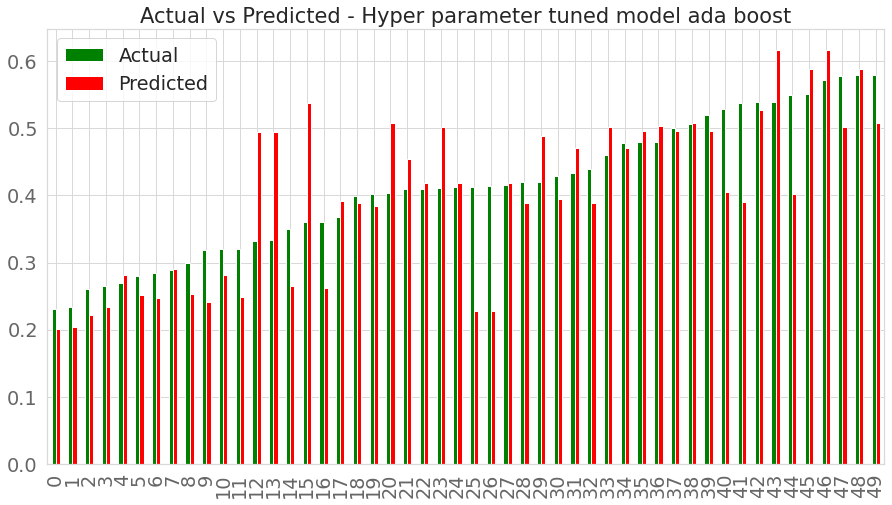

      Actual  Predicted       MAPE
0   0.229989   0.210552   8.451284
1   0.233949   0.243484   4.075665
2   0.259990   0.228528  12.101334
3   0.265291   0.230357  13.168156
4   0.269991   0.369449  36.837450
5   0.279951   0.299786   7.085156
6   0.284651   0.261514   8.128483
7   0.288772   0.383536  32.816448
8   0.299952   0.345398  15.151086
9   0.317993   0.284303  10.594353
10  0.319713   0.324315   1.439627
11  0.319953   0.262362  17.999844
12  0.331613   0.554597  67.241972
13  0.333073   0.554597  66.508851
14  0.349874   0.408163  16.659911
15  0.359794   0.554597  54.142637
16  0.359974   0.294321  18.238360
17  0.367355   0.406000  10.519841
18  0.399796   0.395083   1.178819
19  0.402676   0.395083   1.885631
20  0.404376   0.534701  32.228690
21  0.409756   0.436241   6.463438
22  0.409996   0.434390   5.949621
23  0.411176   0.507721  23.480120
24  0.412416   0.436918   5.941014
25  0.412737   0.297597  27.896692
26  0.414197   0.297597  28.150859
27  0.415997   0.457

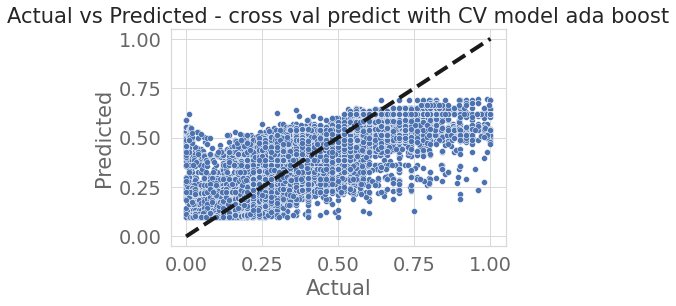

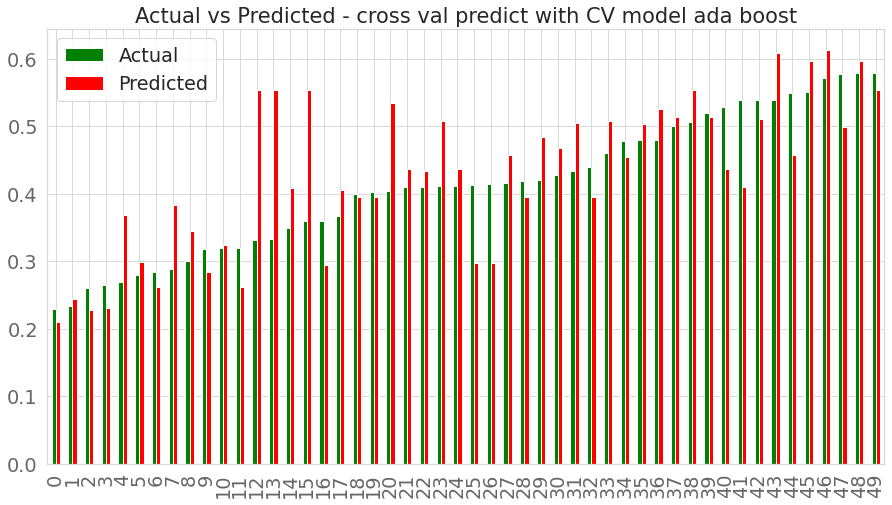

DTC...
       Actual  Predicted          MAPE
0   0.229989   0.109984  5.217845e+01
1   0.233949   0.249990  6.856459e+00
2   0.259990   0.304992  1.730902e+01
3   0.265291   0.337854  2.735223e+01
4   0.269991   0.159986  4.074376e+01
5   0.279951   0.299932  7.137244e+00
6   0.284651   0.284991  1.194491e-01
7   0.288772   0.004840  9.832387e+01
8   0.299952   0.319893  6.647996e+00
9   0.317993   0.319793  5.660733e-01
10  0.319713   0.329993  3.215515e+00
11  0.319953   0.179954  4.375612e+01
12  0.331613   0.359994  8.558504e+00
13  0.333073   0.359994  8.082628e+00
14  0.349874   0.664007  8.978449e+01
15  0.359794   0.359794  0.000000e+00
16  0.359974   0.329993  8.328703e+00
17  0.367355   0.333993  9.081505e+00
18  0.399796   0.330913  1.722948e+01
19  0.402676   0.330913  1.782149e+01
20  0.404376   0.439878  8.779306e+00
21  0.409756   0.328993  1.971006e+01
22  0.409996   0.614105  4.978292e+01
23  0.411176   0.499800  2.155365e+01
24  0.412416   0.614105  4.890398e+01
25  

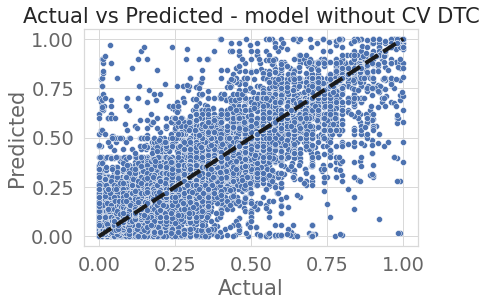

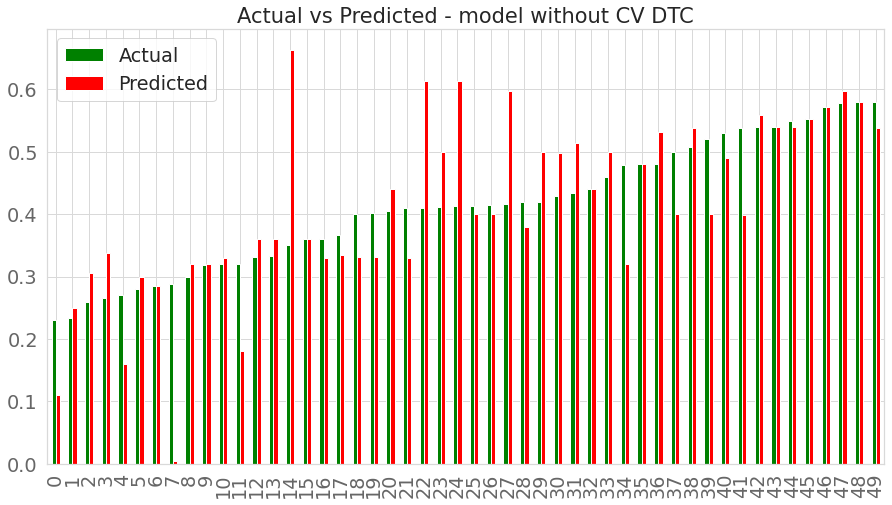

done
Now tuning DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best').
Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   14.6s finished


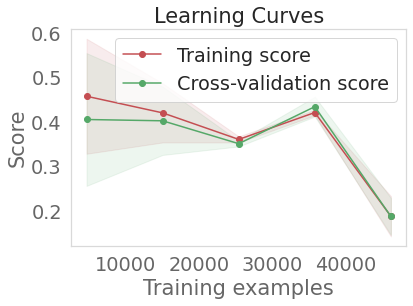

      Actual  Predicted       MAPE
0   0.229989   0.141951  38.279078
1   0.233949   0.180492  22.849859
2   0.259990   0.180492  30.577337
3   0.265291   0.180492  31.964325
4   0.269991   0.141951  47.423595
5   0.279951   0.340954  21.790417
6   0.284651   0.223150  21.605777
7   0.288772   0.340954  18.070402
8   0.299952   0.340954  13.669431
9   0.317993   0.379431  19.320775
10  0.319713   0.223150  30.202903
11  0.319953   0.223150  30.255261
12  0.331613   0.379431  14.419844
13  0.333073   0.379431  13.918273
14  0.349874   0.223150  36.219826
15  0.359794   0.379431   5.457836
16  0.359974   0.379431   5.405101
17  0.367355   0.340954   7.186777
18  0.399796   0.340954  14.718072
19  0.402676   0.340954  15.328045
20  0.404376   0.652203  61.286110
21  0.409756   0.379431   7.400742
22  0.409996   0.340954  16.839823
23  0.411176   0.223150  45.728836
24  0.412416   0.340954  17.327815
25  0.412737   0.180492  56.269374
26  0.414197   0.180492  56.423526
27  0.415997   0.340

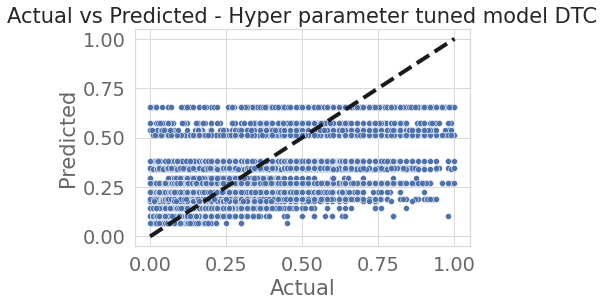

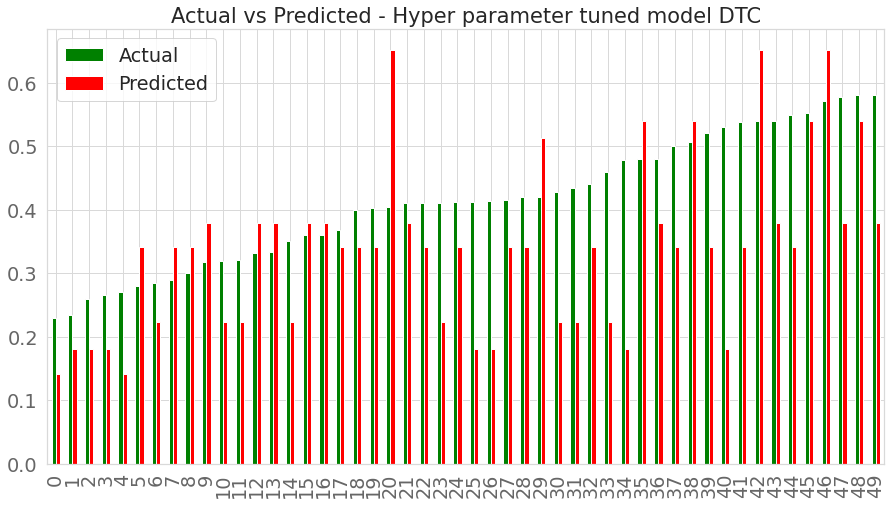

      Actual  Predicted       MAPE
0   0.229989   0.321825  39.930365
1   0.233949   0.237727   1.614711
2   0.259990   0.378078  45.420024
3   0.265291   0.237727  10.389982
4   0.269991   0.237727  11.949976
5   0.279951   0.237727  15.082712
6   0.284651   0.378078  32.821451
7   0.288772   0.231530  19.822457
8   0.299952   0.237727  20.744997
9   0.317993   0.378078  18.895207
10  0.319713   0.237727  25.643586
11  0.319953   0.231530  27.636222
12  0.331613   0.231565  30.170019
13  0.333073   0.231565  30.476126
14  0.349874   0.378078   8.061218
15  0.359794   0.546239  51.819708
16  0.359974   0.321825  10.597885
17  0.367355   0.231530  36.973738
18  0.399796   0.237727  40.537932
19  0.402676   0.231530  42.502192
20  0.404376   0.378078   6.503369
21  0.409756   0.378078   7.731005
22  0.409996   0.321825  21.505475
23  0.411176   0.237727  42.183711
24  0.412416   0.378078   8.326145
25  0.412737   0.378078   8.397224
26  0.414197   0.378078   8.720127
27  0.415997   0.378

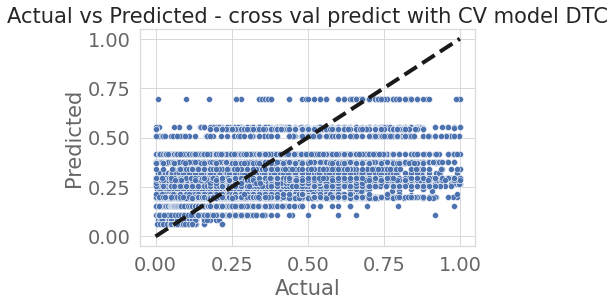

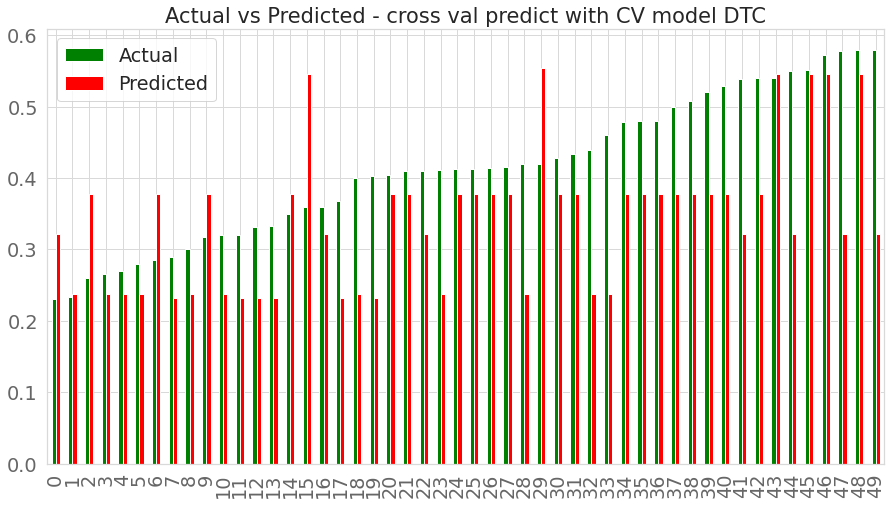

knn...
       Actual  Predicted       MAPE
0   0.229989   0.239976   4.342407
1   0.233949   0.197055  15.770425
2   0.259990   0.209988  19.232249
3   0.265291   0.243910   8.059409
4   0.269991   0.149986  44.447737
5   0.279951   0.316626  13.100426
6   0.284651   0.243250  14.544688
7   0.288772   0.323180  11.915316
8   0.299952   0.307152   2.400480
9   0.317993   0.423264  33.104807
10  0.319713   0.303212   5.161089
11  0.319953   0.289992   9.364256
12  0.331613   0.442624  33.476076
13  0.333073   0.442624  32.890971
14  0.349874   0.454665  29.951028
15  0.359794   0.490466  36.318491
16  0.359974   0.673307  87.043005
17  0.367355   0.336593   8.373714
18  0.399796   0.331327  17.126086
19  0.402676   0.355294  11.766751
20  0.404376   0.504580  24.779899
21  0.409756   0.640006  56.191731
22  0.409996   0.509194  24.194676
23  0.411176   0.393262   4.356779
24  0.412416   0.383309   7.057873
25  0.412737   0.289892  29.763520
26  0.414197   0.289892  30.011106
27  0.415997

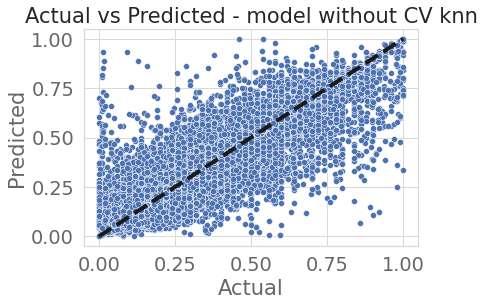

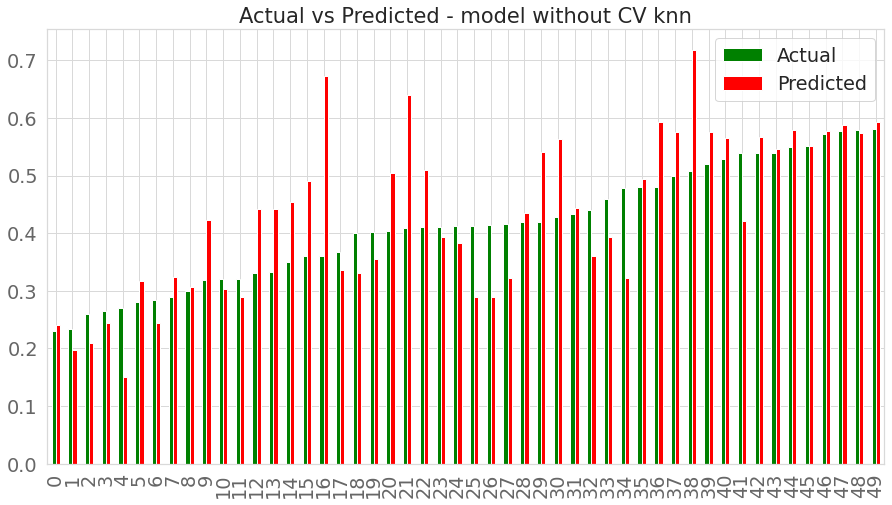

done
random forest...
       Actual  Predicted       MAPE
0   0.229989   0.218911   4.816883
1   0.233949   0.263806  12.762066
2   0.259990   0.183688  29.348322
3   0.265291   0.202348  23.725765
4   0.269991   0.377680  39.886184
5   0.279951   0.270534   3.363933
6   0.284651   0.213930  24.844827
7   0.288772   0.319074  10.493672
8   0.299952   0.273117   8.946595
9   0.317993   0.247954  22.025373
10  0.319713   0.318409   0.407923
11  0.319953   0.206257  35.535167
12  0.331613   0.388393  17.122266
13  0.333073   0.388393  16.608849
14  0.349874   0.302285  13.601754
15  0.359794   0.570626  58.597908
16  0.359974   0.284450  20.980427
17  0.367355   0.366022   0.362726
18  0.399796   0.365239   8.643745
19  0.402676   0.365239   9.297165
20  0.404376   0.588525  45.538985
21  0.409756   0.375687   8.314541
22  0.409996   0.376792   8.098618
23  0.411176   0.431250   4.881879
24  0.412416   0.376792   8.637903
25  0.412737   0.369167  10.556245
26  0.414197   0.369167  10.8715

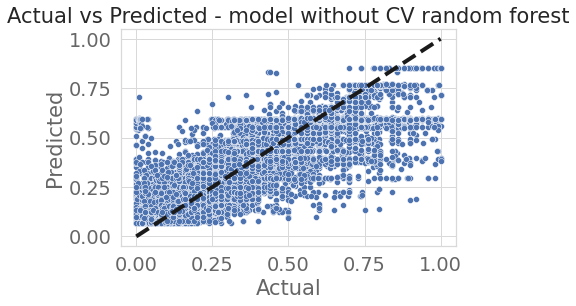

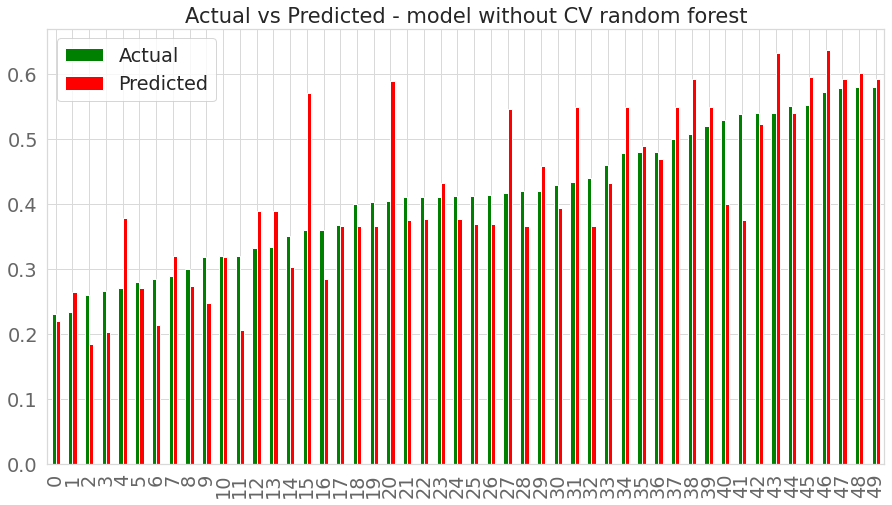

done
comparision of all models
            Model                 Techniques  ...       MSE       MAE
0           ridge     All Feature without CV  ...  0.013651  0.081266
1           ridge  Randomized Search with CV  ...  0.013652  0.081267
2           ridge          Cross val with CV  ...  0.013886  0.081591
3             sgd     All Feature without CV  ...  0.043192  0.170141
4             sgd  Randomized Search with CV  ...  0.013661  0.081257
5             sgd          Cross val with CV  ...  0.014944  0.086435
6          mlp-nn     All Feature without CV  ...  0.007836  0.058272
7          mlp-nn  Randomized Search with CV  ...  0.012106  0.073329
8          mlp-nn          Cross val with CV  ...  0.013255  0.077385
9             gbm     All Feature without CV  ...  0.008146  0.058632
10            gbm  Randomized Search with CV  ...  0.008055  0.057017
11            gbm          Cross val with CV  ...  0.009032  0.059965
12            gbm                RFE with CV  ...  0.008002

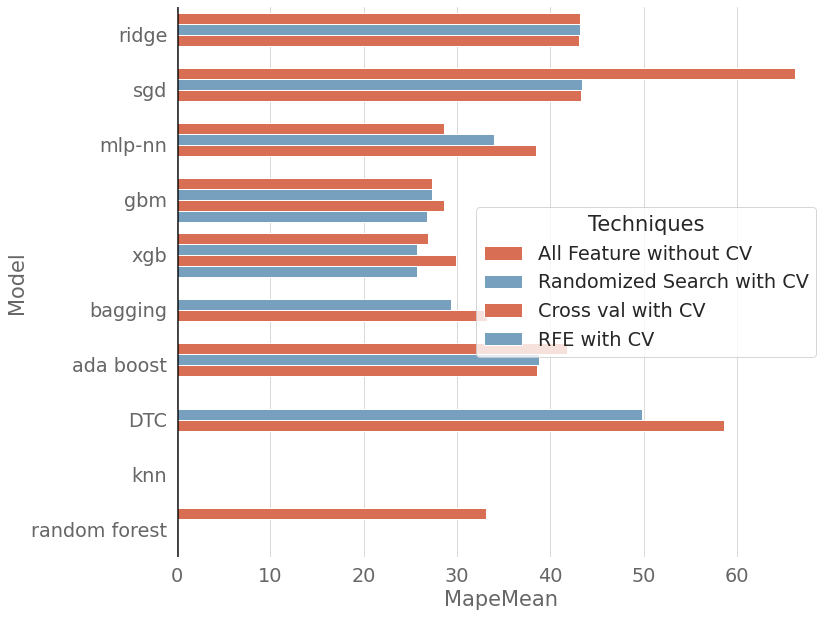

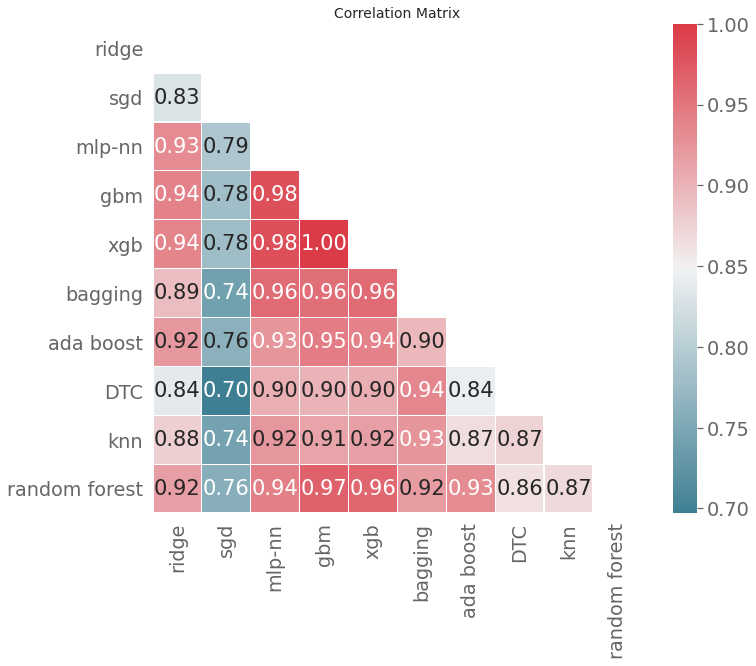

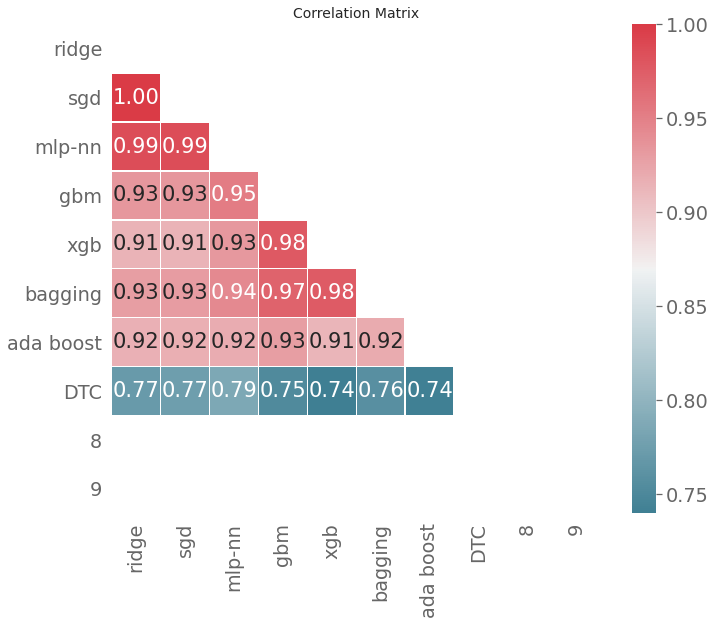

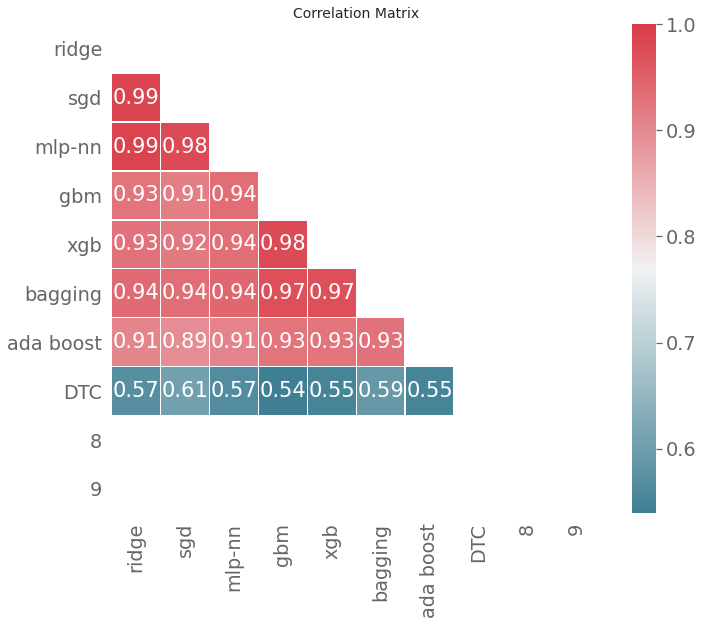

0
1
2
3
4
5
6
7
      Actual  Predicted       MAPE
0   0.229989   0.233524   1.536993
1   0.233949   0.236304   1.006572
2   0.259990   0.264853   1.870228
3   0.265291   0.210389  20.694759
4   0.269991   0.245539   9.056713
5   0.279951   0.276652   1.178655
6   0.284651   0.246344  13.457788
7   0.288772   0.297768   3.115382
8   0.299952   0.294768   1.728238
9   0.317993   0.345074   8.516220
10  0.319713   0.286990  10.235155
11  0.319953   0.230922  27.826252
12  0.331613   0.379002  14.290358
13  0.333073   0.379002  13.789356
14  0.349874   0.334873   4.287680
15  0.359794   0.494564  37.457476
16  0.359974   0.340398   5.438323
17  0.367355   0.379082   3.192479
18  0.399796   0.356249  10.892393
19  0.402676   0.346307  13.998667
20  0.404376   0.467338  15.570201
21  0.409756   0.425125   3.750694
22  0.409996   0.377918   7.824042
23  0.411176   0.472306  14.866987
24  0.412416   0.385273   6.581521
25  0.412737   0.332694  19.393015
26  0.414197   0.332694  19.677158
27  

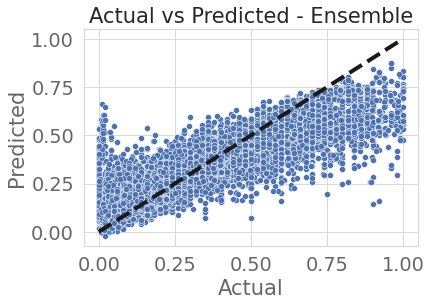

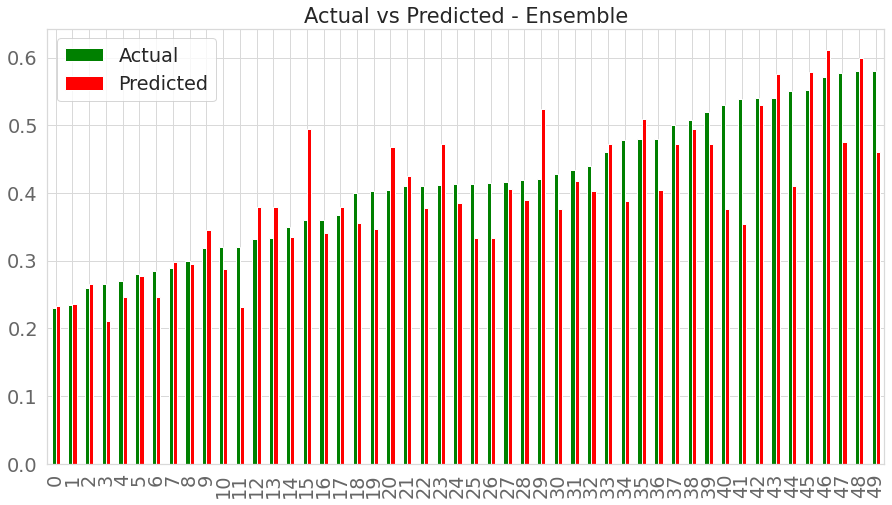

Done.



In [16]:
model.regressMultipleModels(predictorTrain, predictorTest, targetTrain, targetTest, 10)